In [1]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
%run mylibrary.ipynb
%run mymodel.ipynb

2025-03-31 21:04:33.104123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743455073.114644 3029239 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743455073.117842 3029239 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 21:04:33.129777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random
from ast import literal_eval

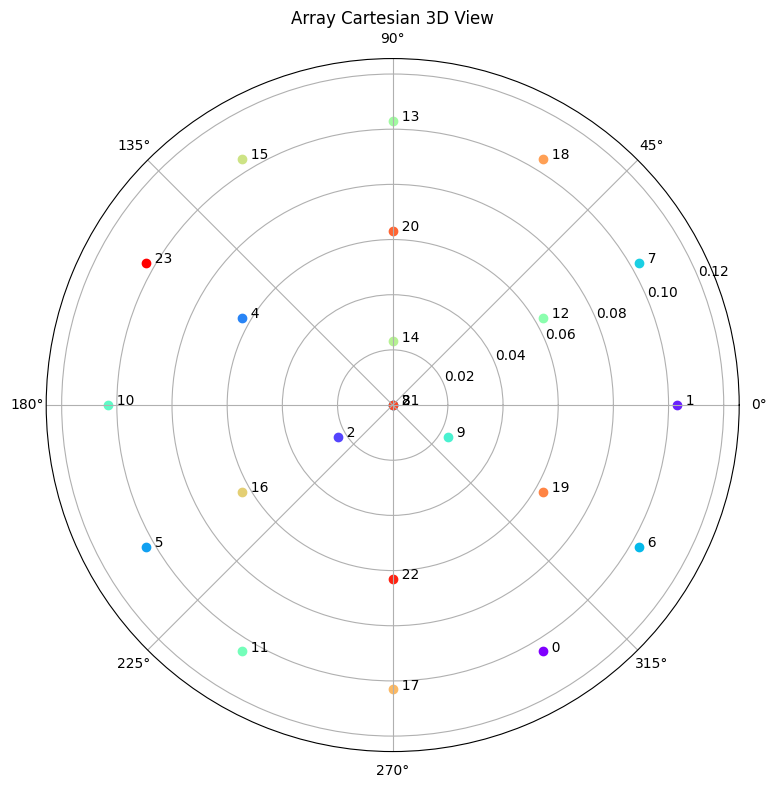

In [4]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = 'plot/')

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

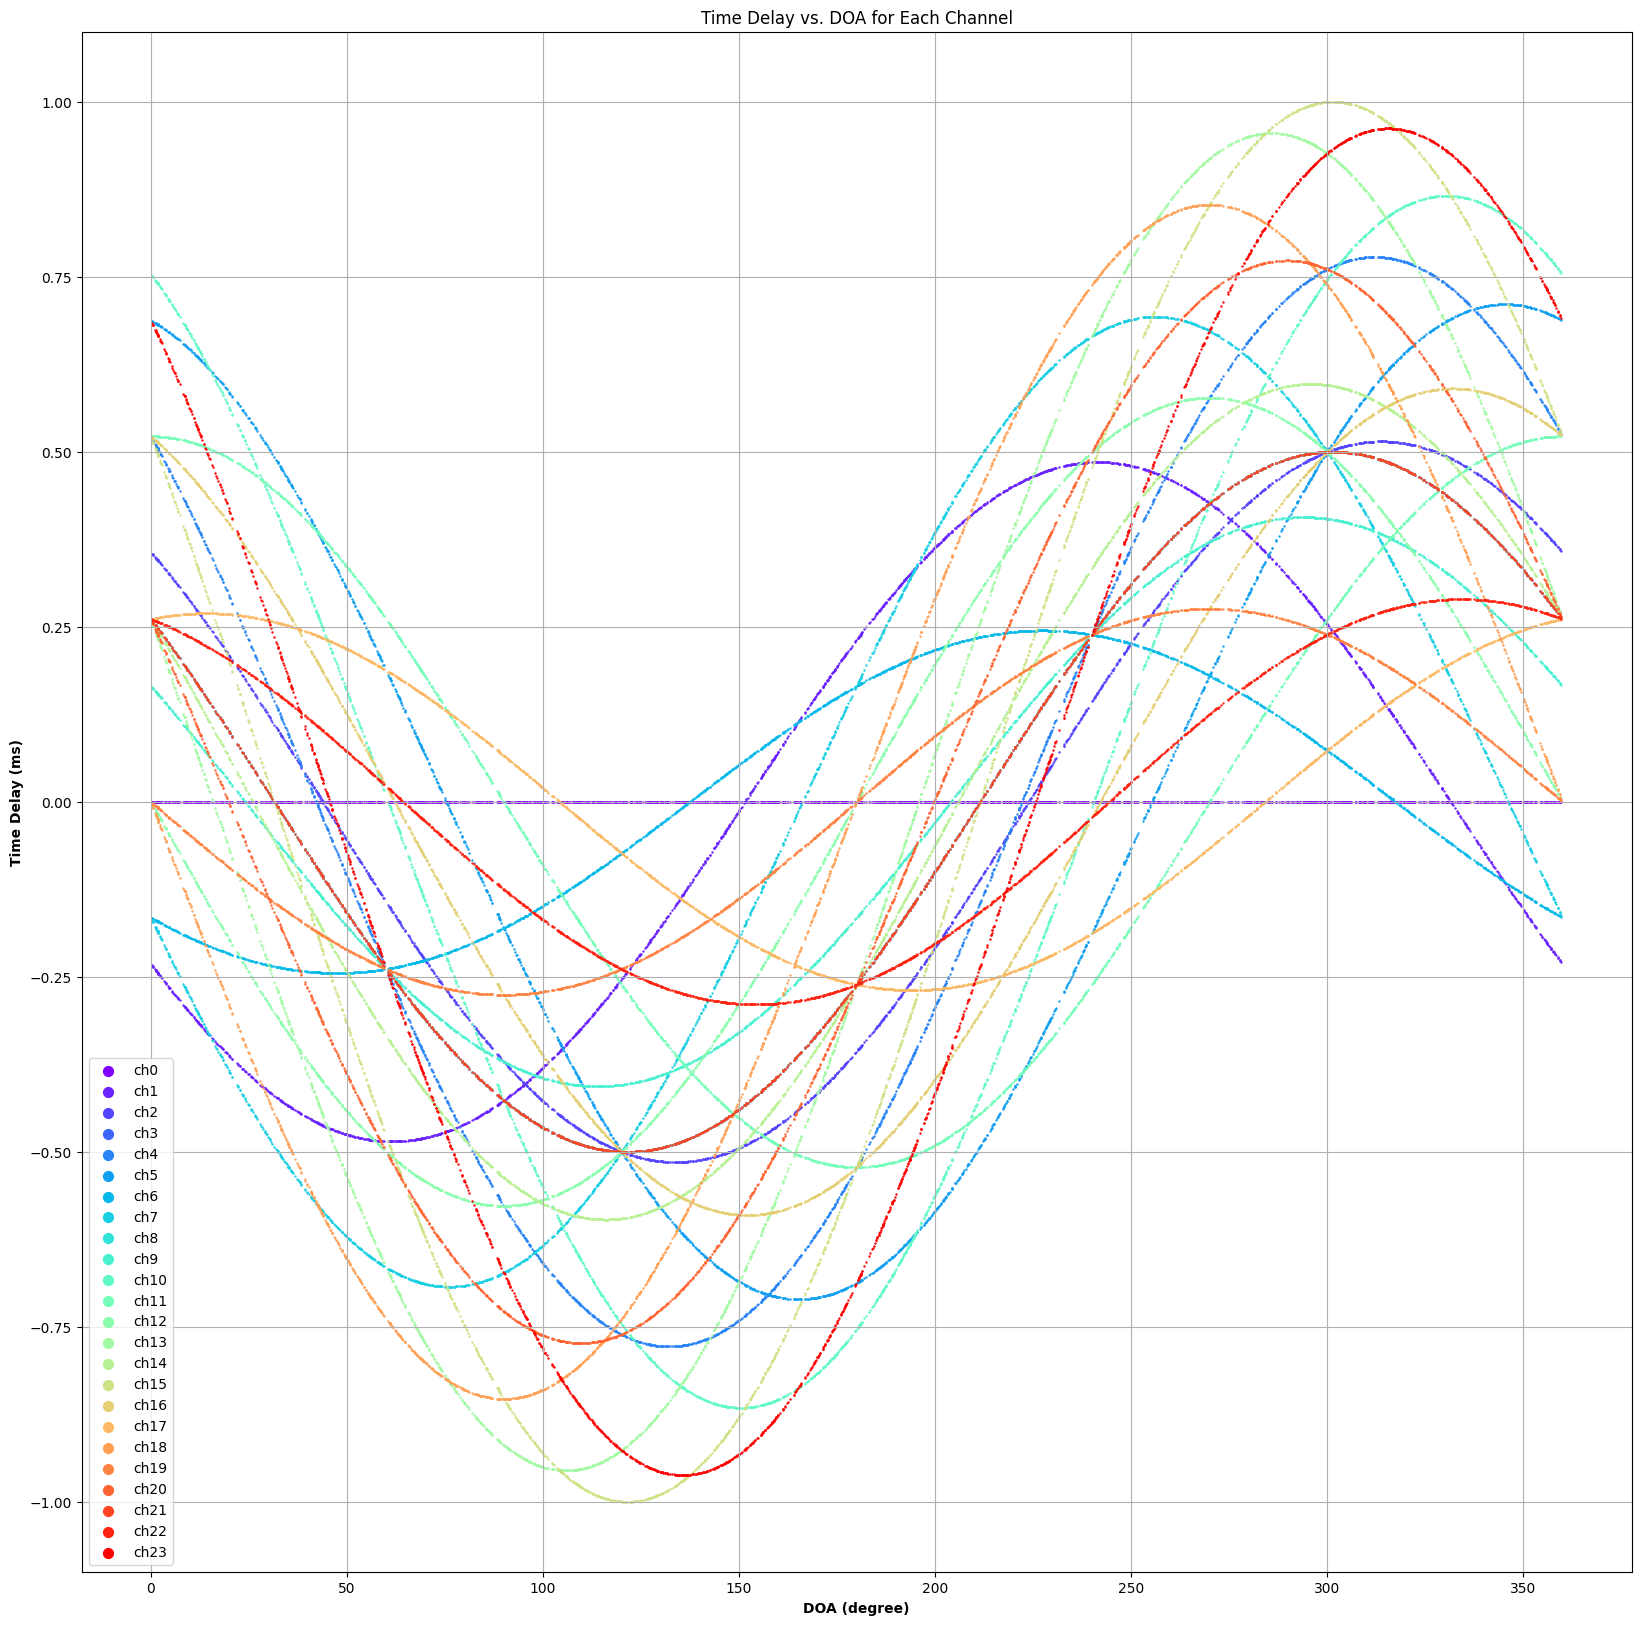

In [17]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
data.set_bound(0.2,359.8)
inputs, labels = data.get_delays_angles()
data.plot()

In [11]:
df_with_he = pd.read_csv("plot/models_evaluation_with_weights_initialization.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in df_with_he.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]
list_channels

[[1, 14, 21],
 [12, 14, 20],
 [10, 11, 13],
 [8, 17, 22],
 [6, 11, 20],
 [7, 8, 21],
 [0, 12, 22],
 [8, 11, 13],
 [2, 10, 22],
 [7, 15, 22],
 [8, 16, 23],
 [1, 4, 14],
 [1, 5, 12],
 [7, 8, 11],
 [3, 11, 17],
 [6, 12, 13],
 [3, 7, 10],
 [4, 13, 23],
 [10, 13, 22],
 [4, 9, 15],
 [4, 16, 17],
 [3, 10, 13],
 [3, 10, 13],
 [8, 10, 15],
 [6, 16, 22],
 [15, 19, 21],
 [1, 13, 19],
 [5, 18, 21],
 [3, 4, 21],
 [7, 9, 11],
 [8, 15, 17],
 [0, 7, 18],
 [1, 14, 21],
 [17, 20, 22],
 [5, 13, 14],
 [4, 14, 22],
 [0, 15, 23],
 [5, 15, 23],
 [3, 7, 10],
 [0, 2, 12],
 [2, 10, 19],
 [3, 9, 20],
 [6, 15, 21],
 [3, 12, 20],
 [10, 12, 13],
 [0, 7, 17],
 [10, 11, 18],
 [13, 14, 16],
 [5, 12, 22],
 [15, 19, 23],
 [0, 2, 4, 6, 14, 23],
 [2, 4, 5, 6, 10, 16],
 [1, 5, 6, 15, 16, 22],
 [2, 5, 9, 13, 17, 22],
 [2, 10, 12, 14, 20, 23],
 [5, 6, 7, 13, 19, 23],
 [5, 11, 13, 15, 21, 22],
 [3, 8, 14, 15, 16, 17],
 [10, 14, 16, 17, 20, 21],
 [0, 1, 2, 13, 14, 15],
 [0, 2, 5, 7, 9, 18],
 [2, 3, 9, 10, 11, 15],
 [4, 8, 9, 1

In [12]:
# Get the list of channels with loss less than 55 
# The 75 is a convience number from the results
top_with_he =  df_with_he.index[df_with_he['Loss'] < 55].tolist()
top_list_channels = [list_channels[i] for i in top_with_he]
top_list_channels.append(list(range(0,24)))
print(len(top_list_channels))
top_list_channels

15


[[6, 12, 13],
 [1, 13, 19],
 [0, 7, 18],
 [3, 12, 20],
 [12, 13, 15, 17, 19, 22],
 [2, 9, 10, 12, 17, 18],
 [2, 7, 9, 13, 19, 20],
 [8, 12, 16, 18, 21, 22],
 [2, 6, 8, 9, 12, 15, 18, 20, 22],
 [0, 2, 4, 8, 9, 12, 18, 19, 22],
 [1, 2, 3, 4, 9, 13, 17, 18, 22],
 [0, 3, 5, 6, 9, 12, 14, 15, 18, 19, 20, 23],
 [2, 3, 4, 6, 8, 10, 12, 13, 14, 15, 17, 18, 19, 22, 23],
 [0, 1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23]]

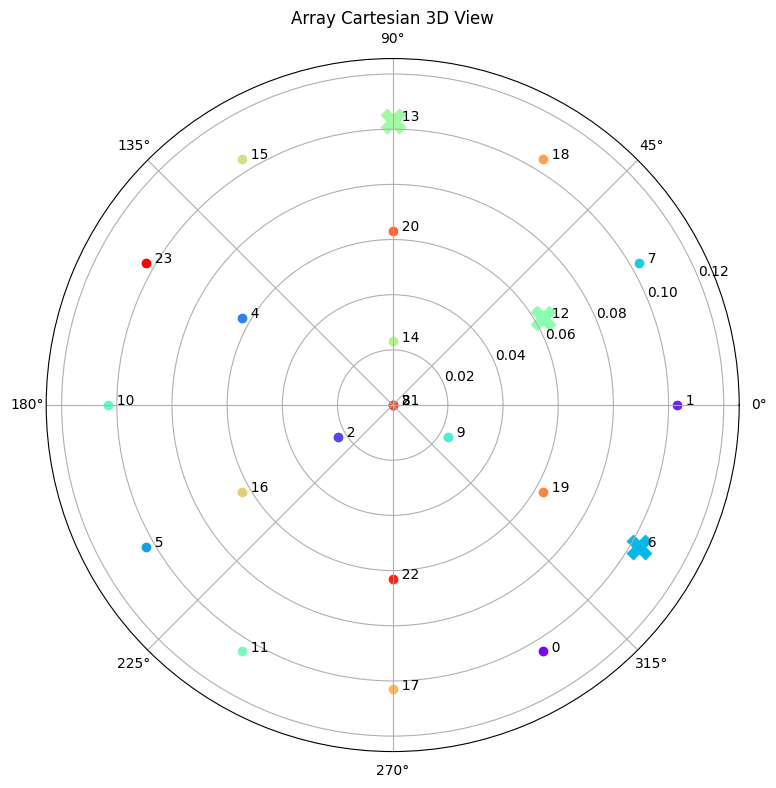

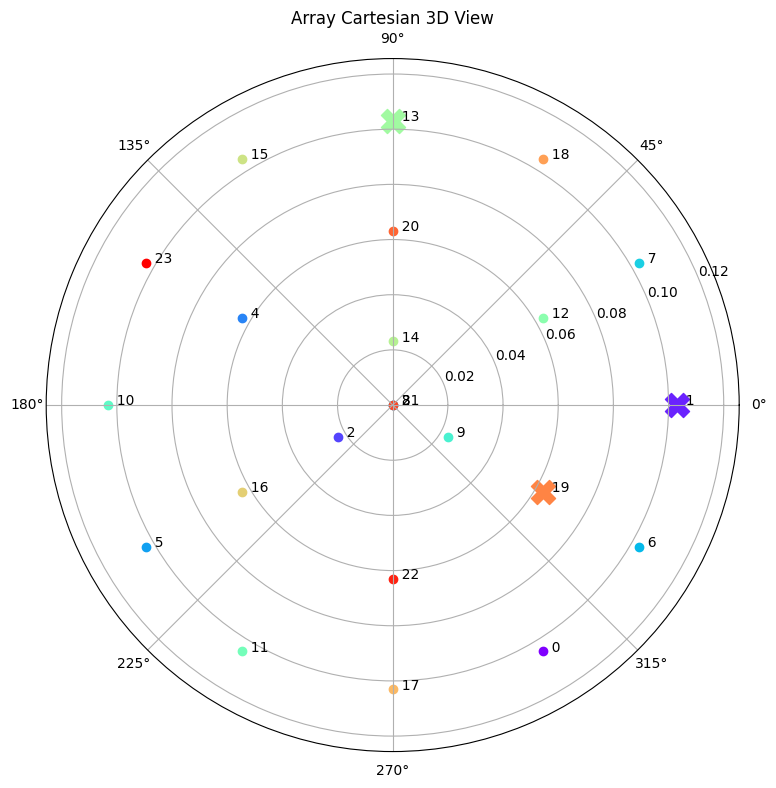

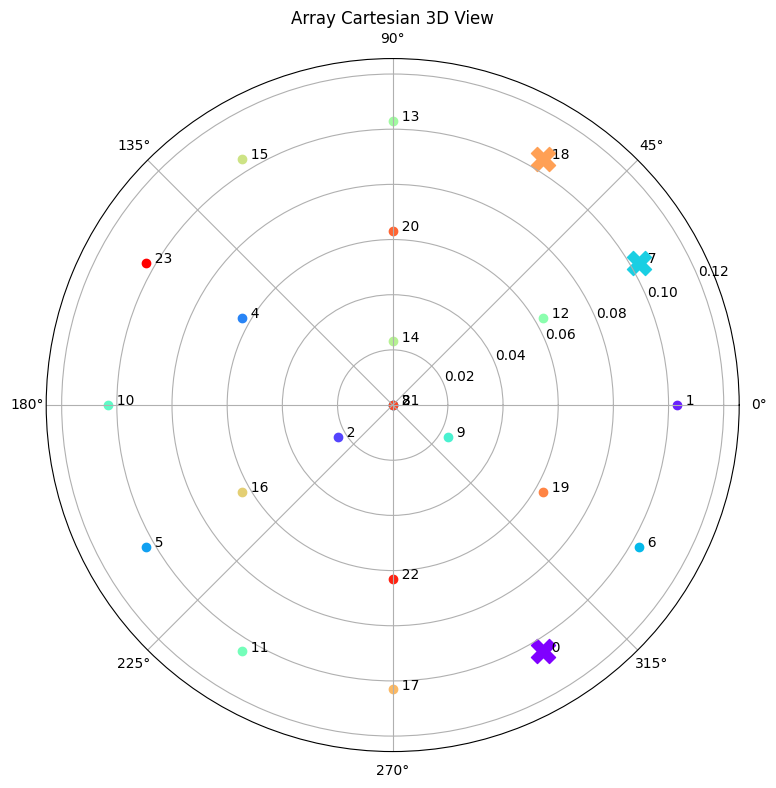

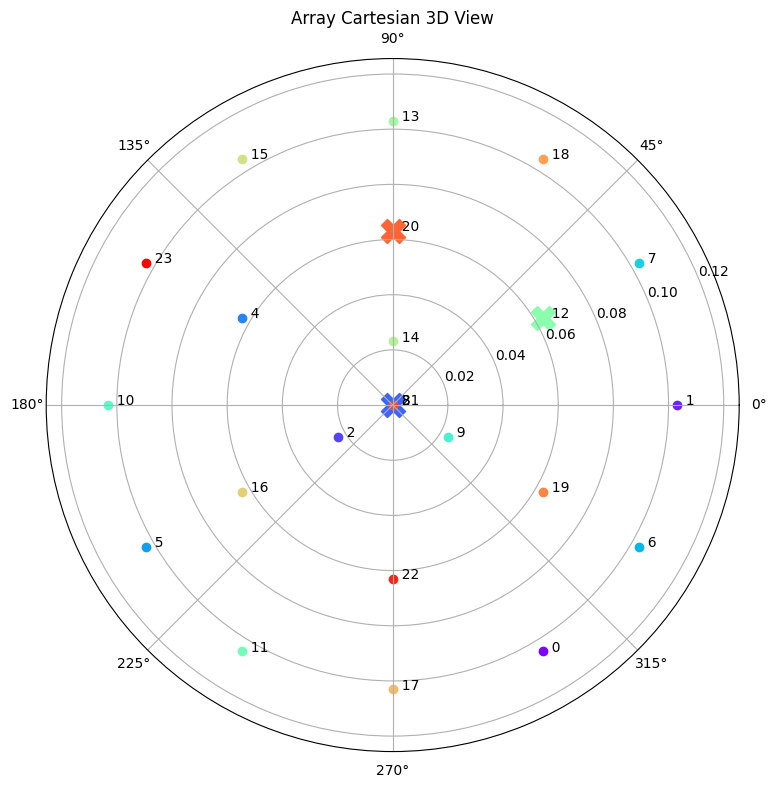

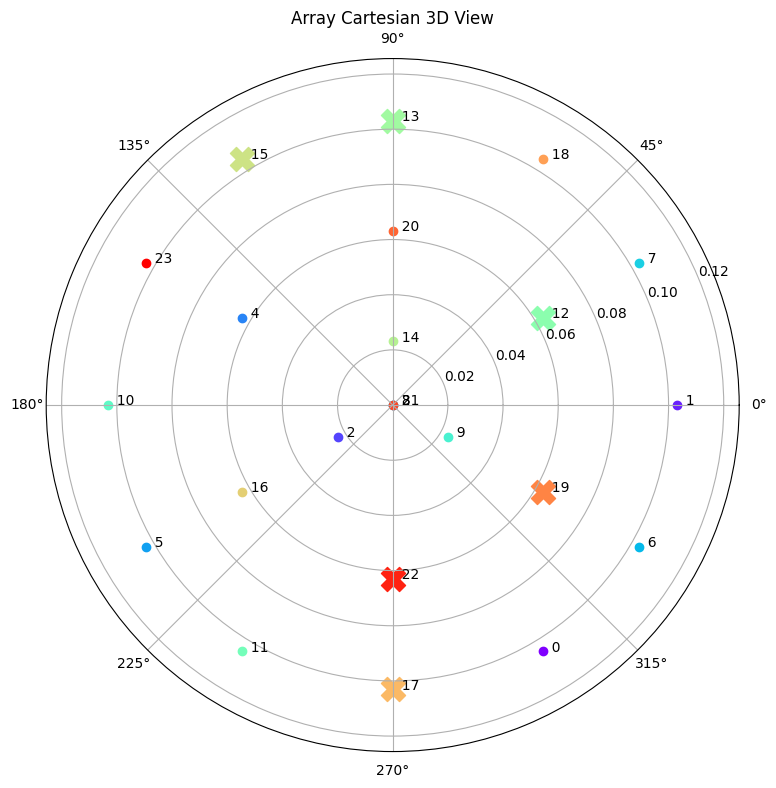

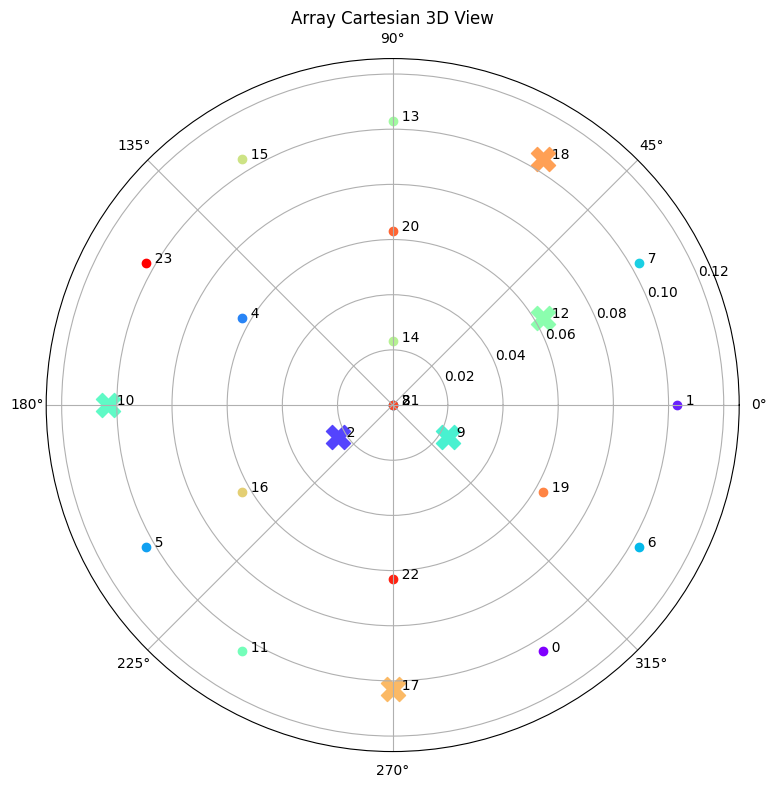

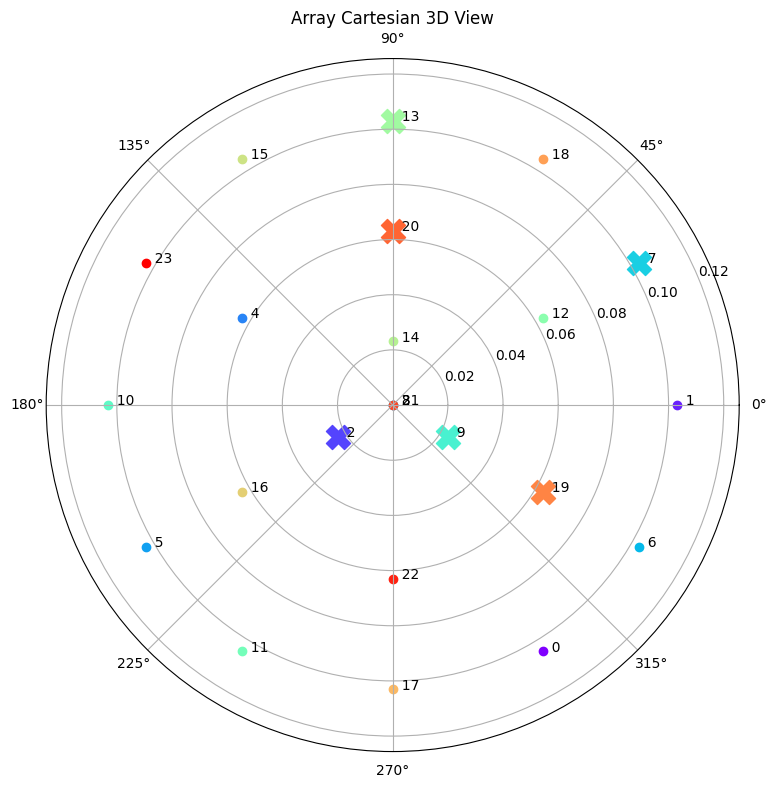

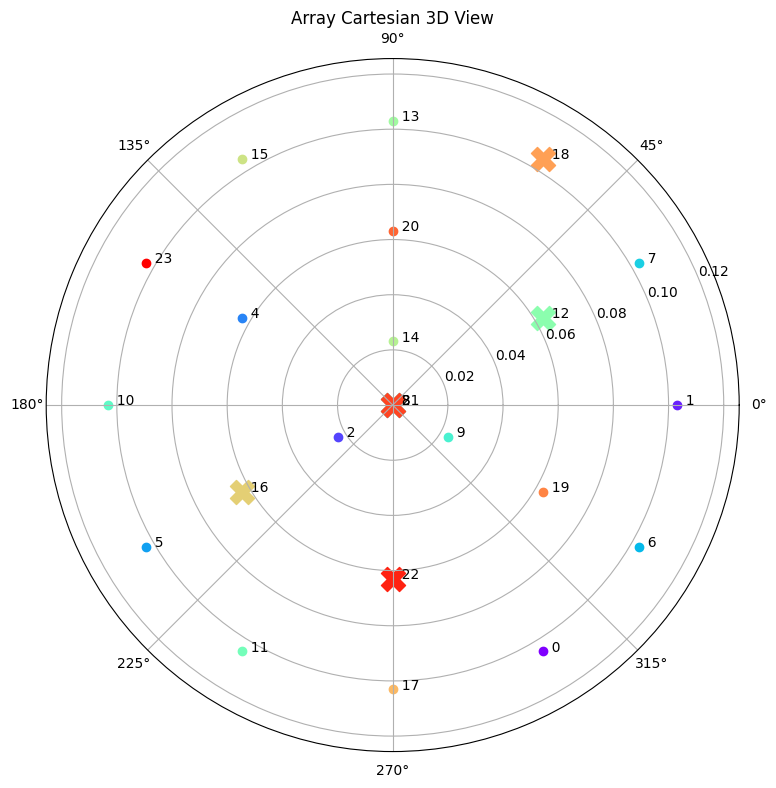

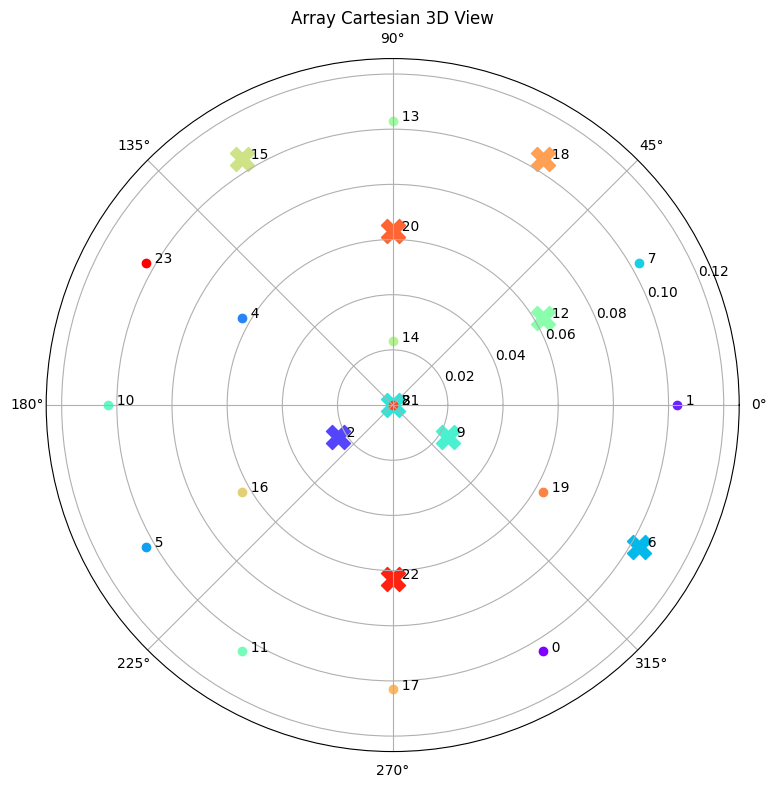

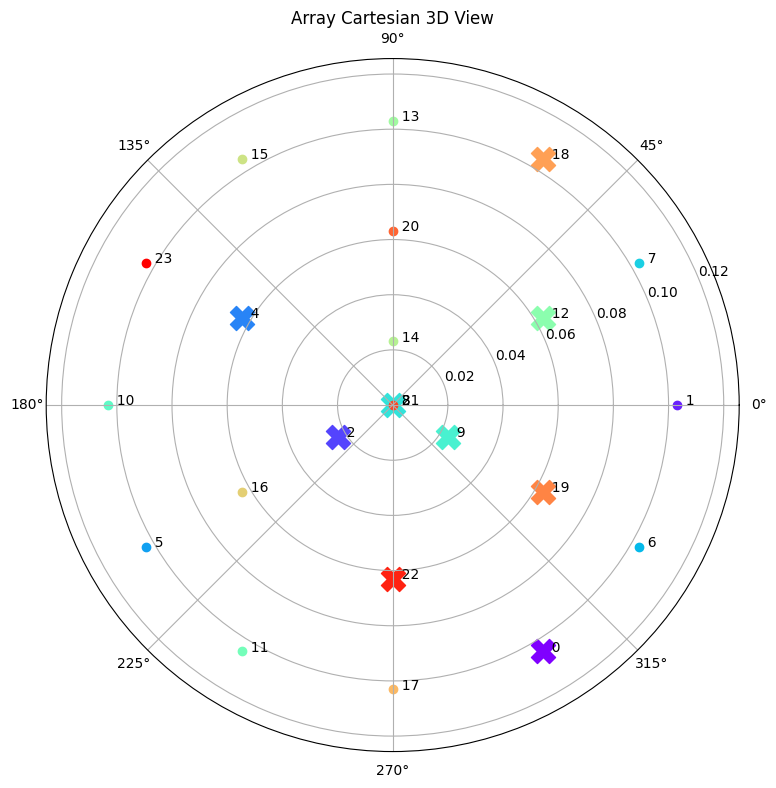

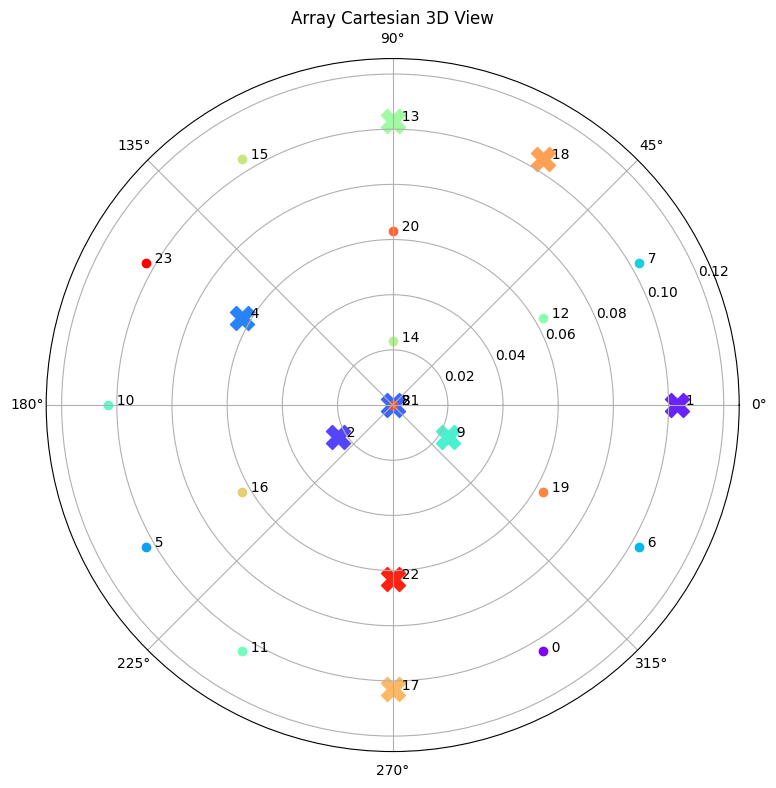

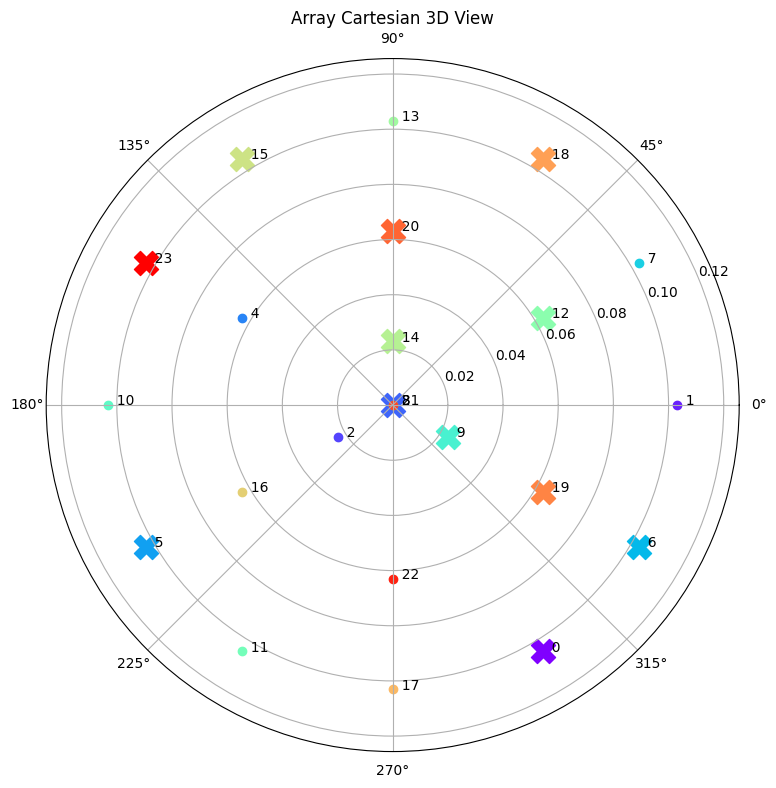

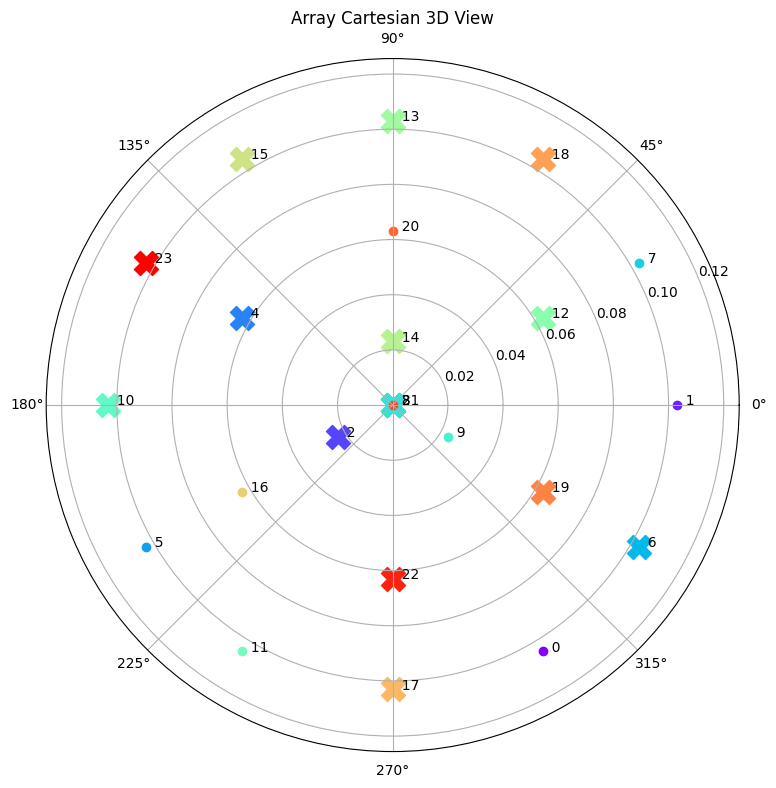

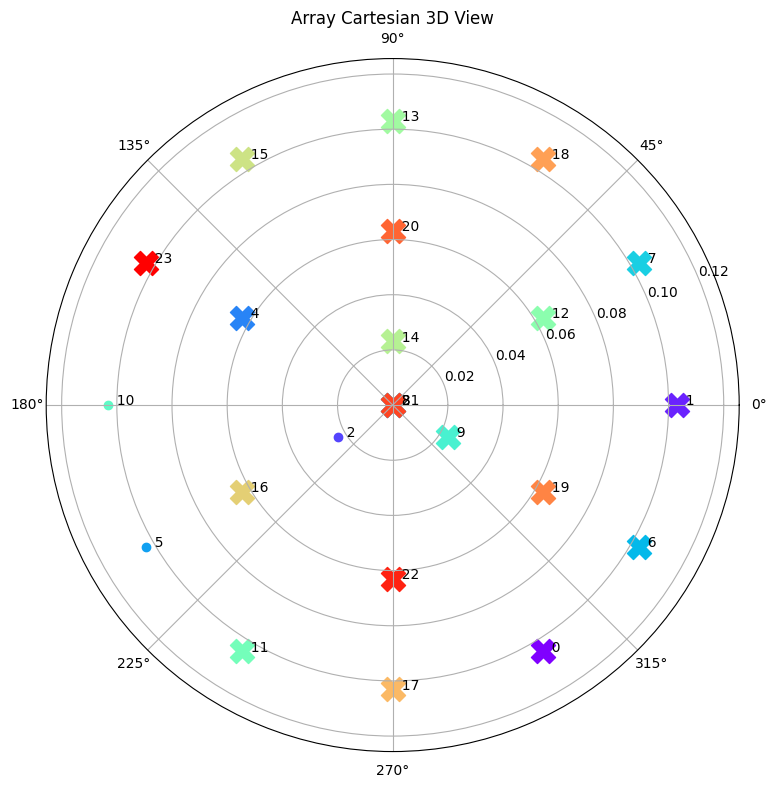

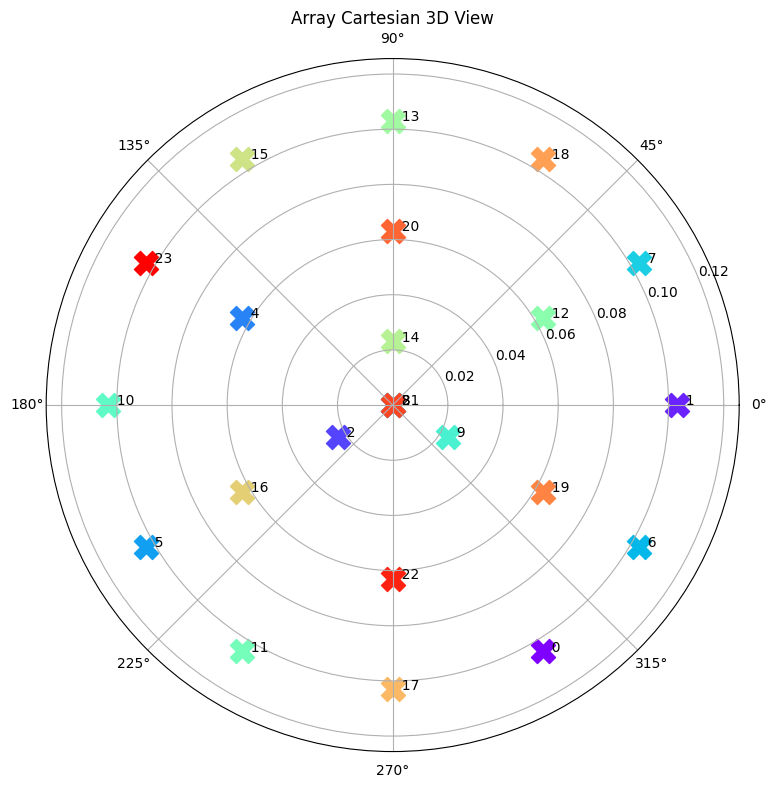

In [100]:
for channels in top_list_channels:
    visualizer.polar(fig_size=(10,9), channels = channels)

2025-03-31 21:06:21.377336: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-31 21:06:26.994319: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-31 21:06:32.345230: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-31 21:06:43.206967: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-31 21:07:05.482025: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/tmp/ipykernel_3029239/128754474.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) 

[[21019.814453125, 21019.814453125, 120.02818298339844],
 [19501.36328125, 19501.36328125, 113.66576385498047],
 [20850.99609375, 20850.998046875, 120.33690643310547],
 [16123.7216796875, 16123.7216796875, 98.55397033691406],
 [23730.830078125, 23730.830078125, 128.33624267578125],
 [20208.580078125, 20208.580078125, 114.92213439941406],
 [18554.826171875, 18554.826171875, 110.56644439697266],
 [22985.11328125, 22985.11328125, 123.23221588134766],
 [24044.3515625, 24044.3515625, 129.32818603515625],
 [20808.720703125, 20808.720703125, 116.05638122558594],
 [19434.794921875, 19434.79296875, 110.54362487792969],
 [19856.302734375, 19856.302734375, 116.71745300292969],
 [23173.009765625, 23173.009765625, 124.79798889160156],
 [22036.072265625, 22036.072265625, 121.0416030883789],
 [20981.31640625, 20981.31640625, 113.67987060546875]]

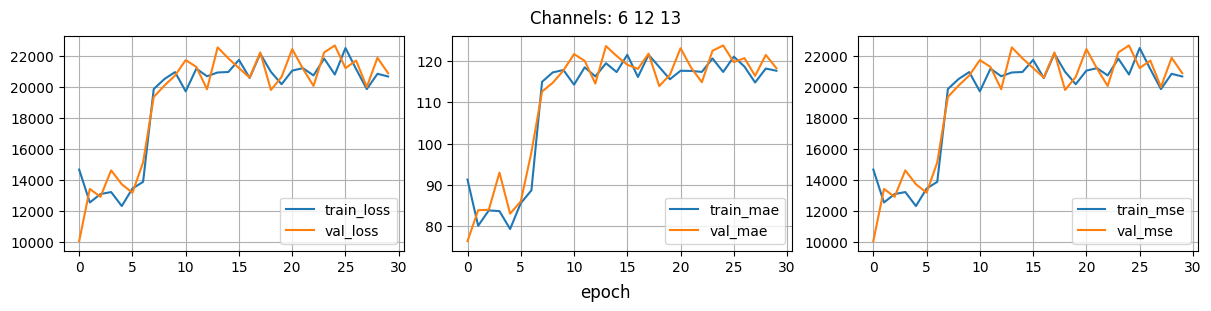

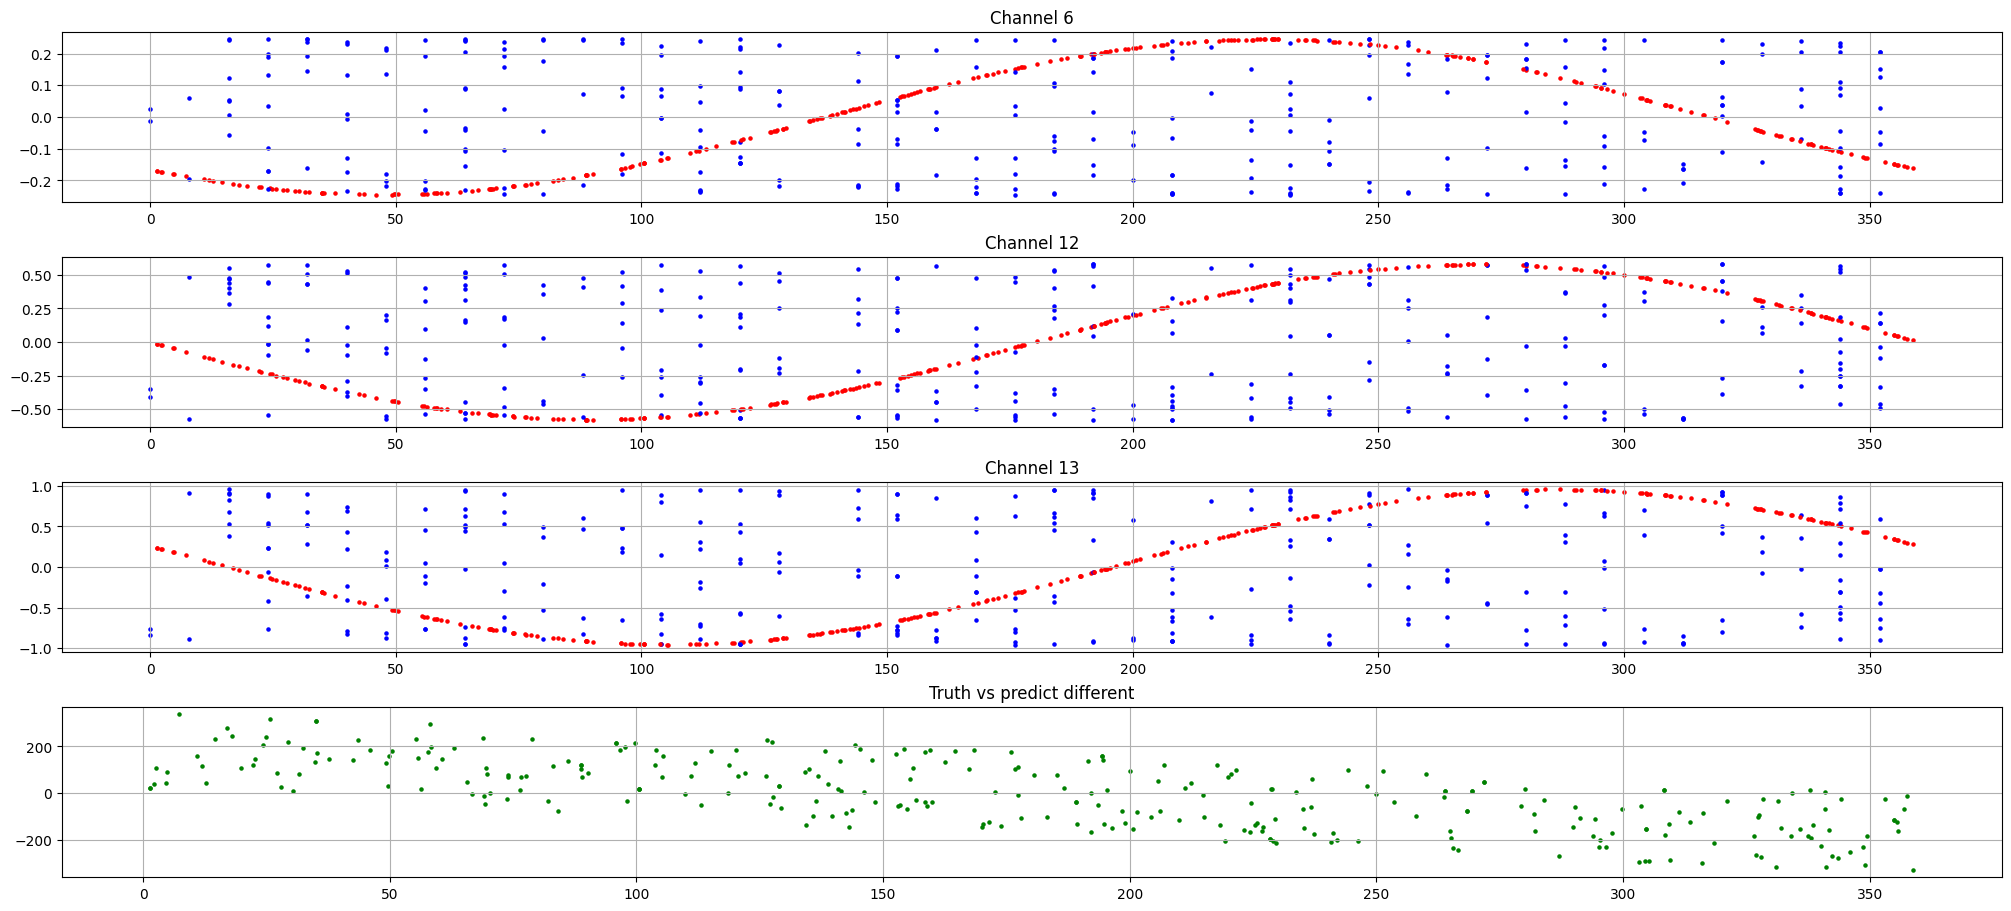

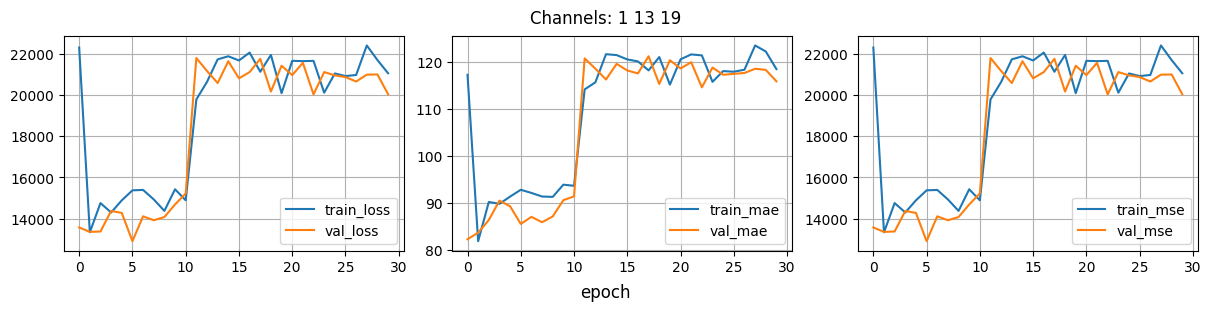

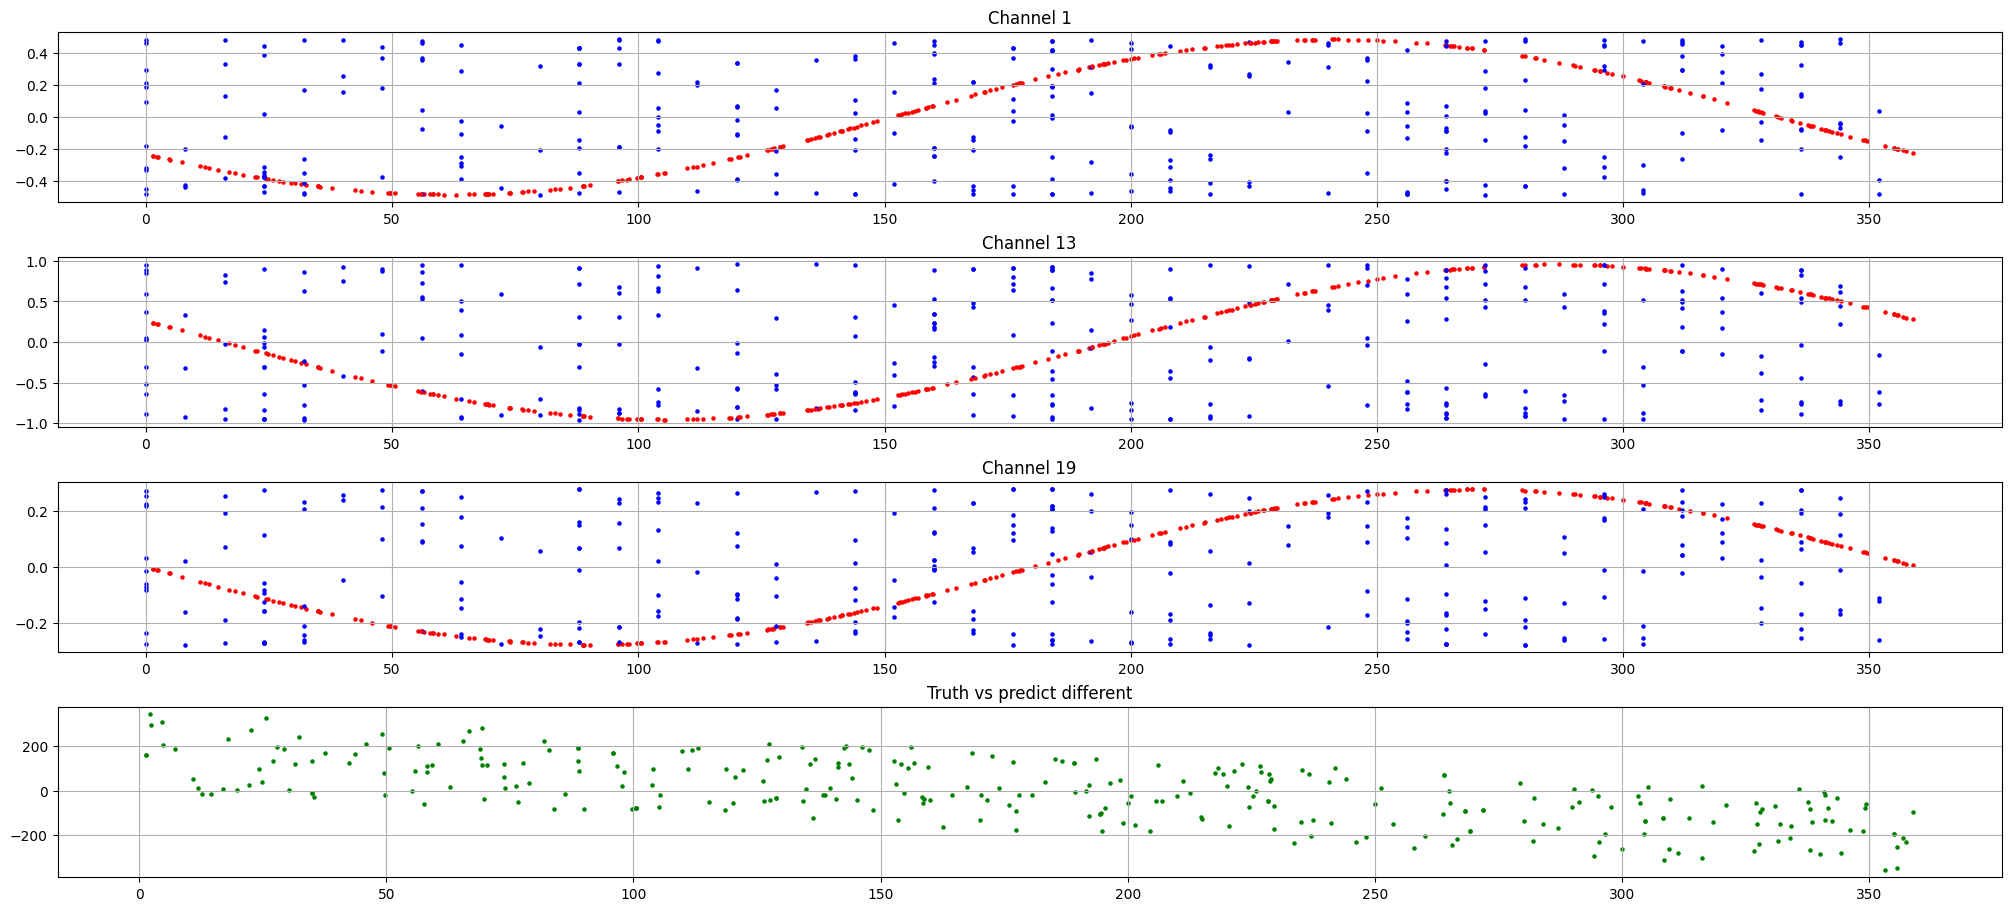

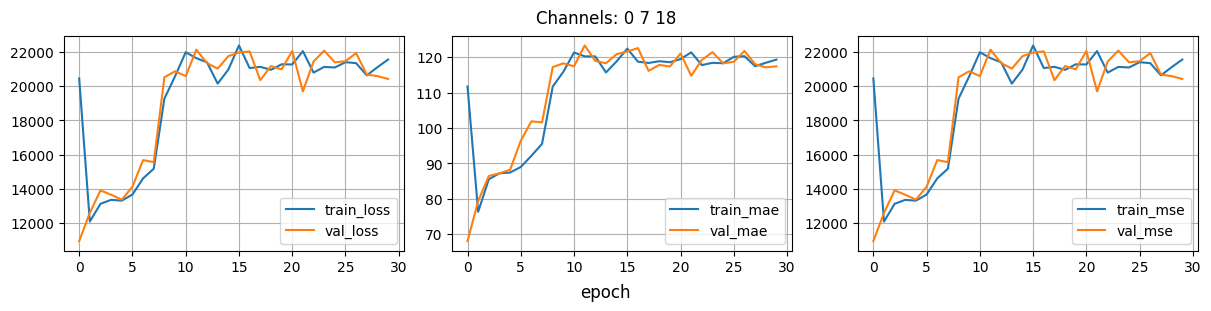

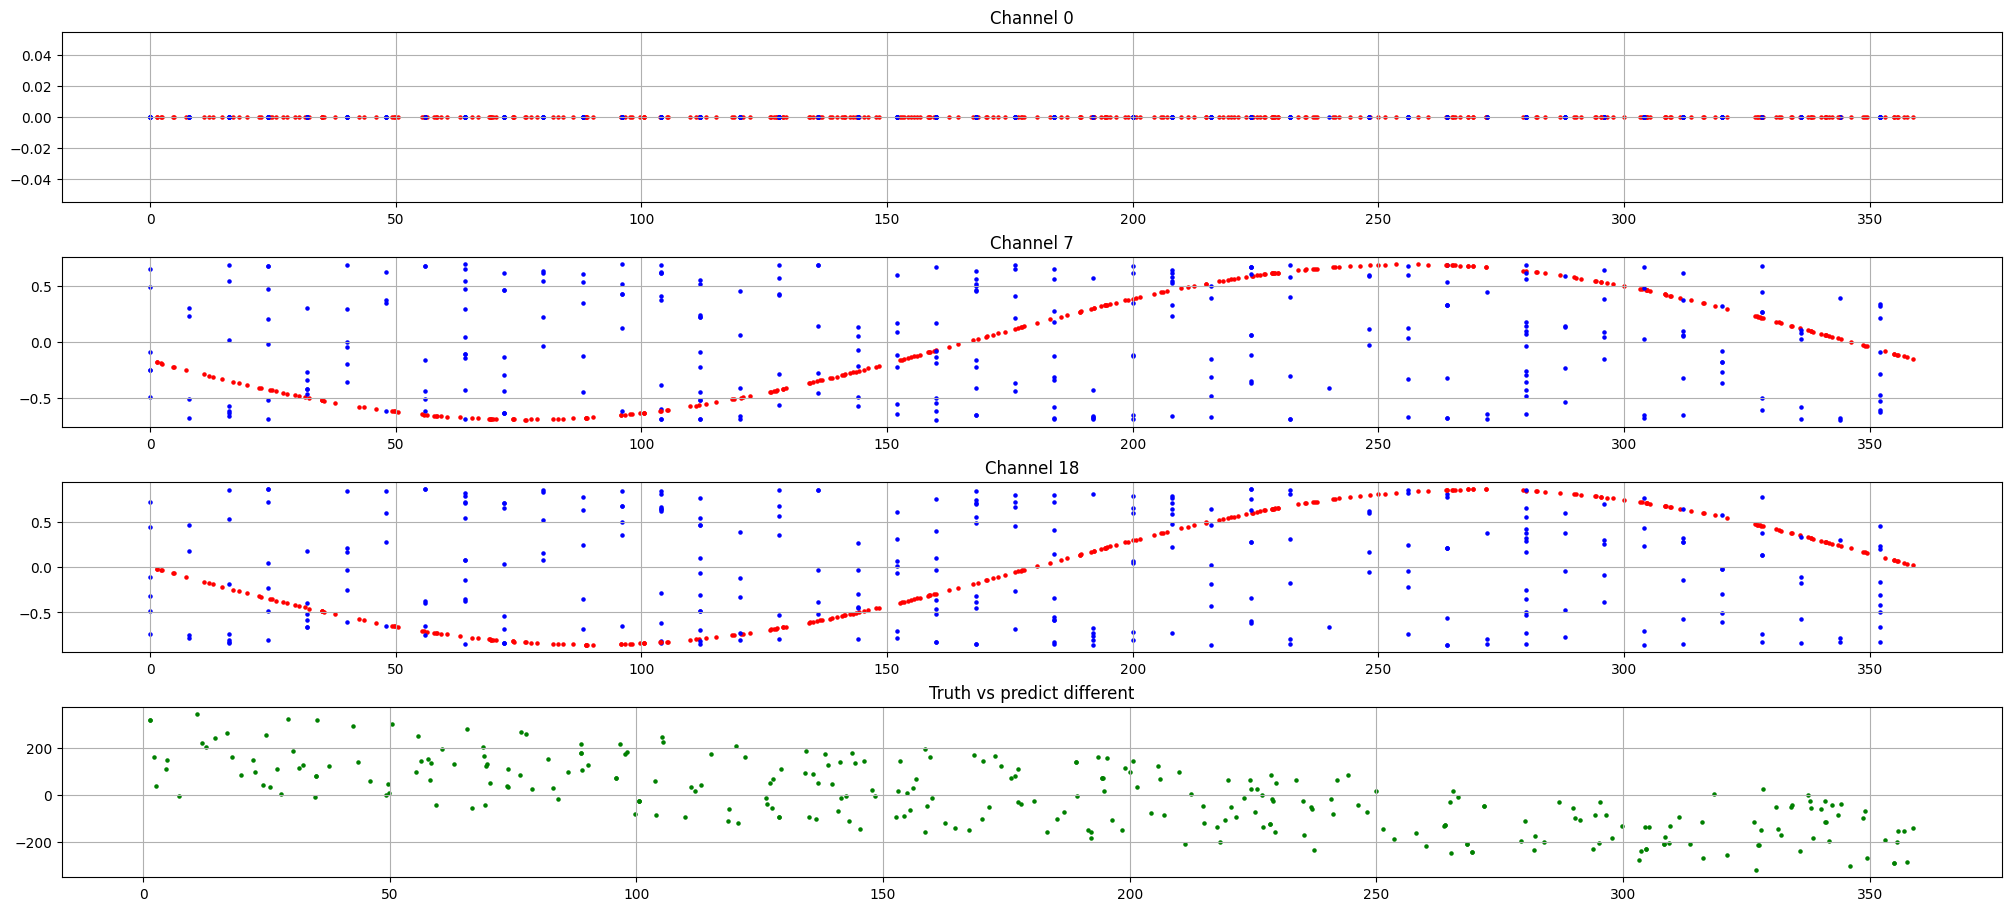

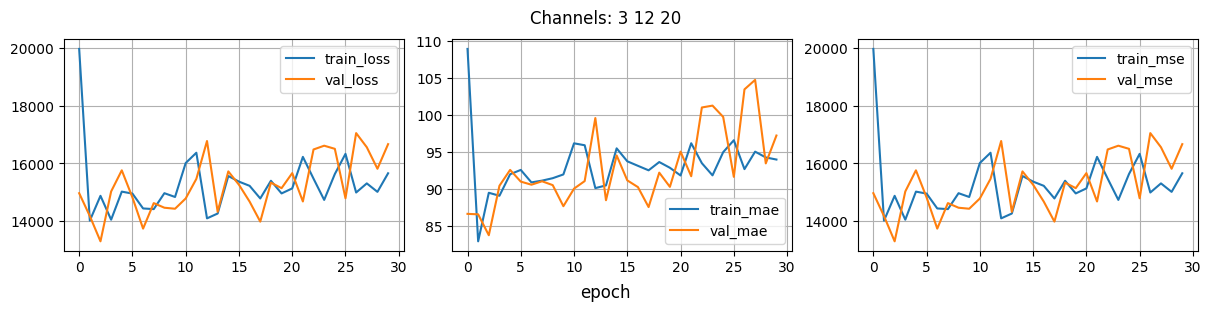

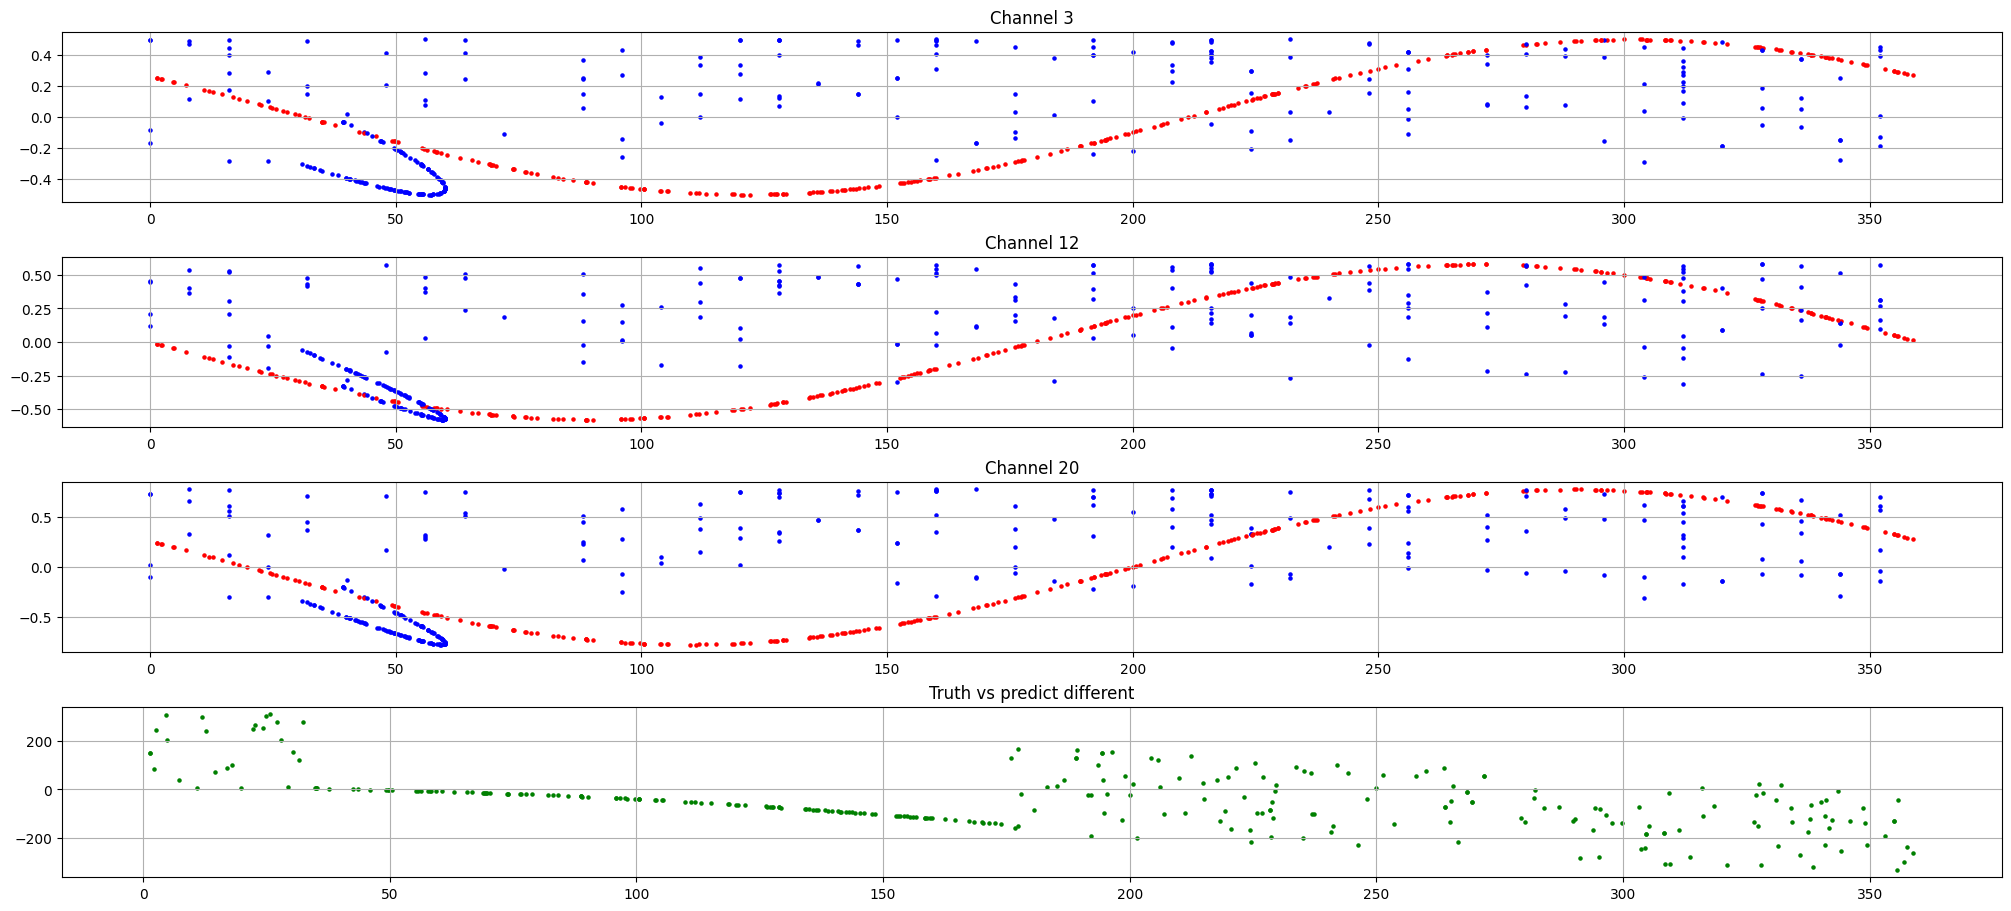

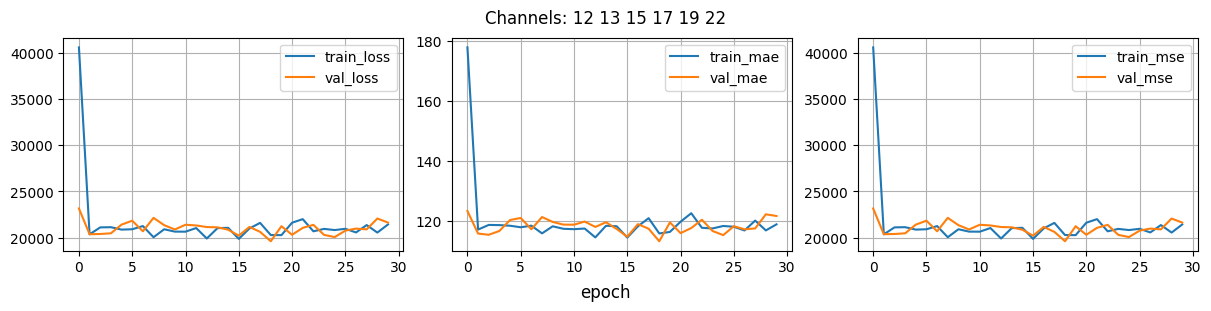

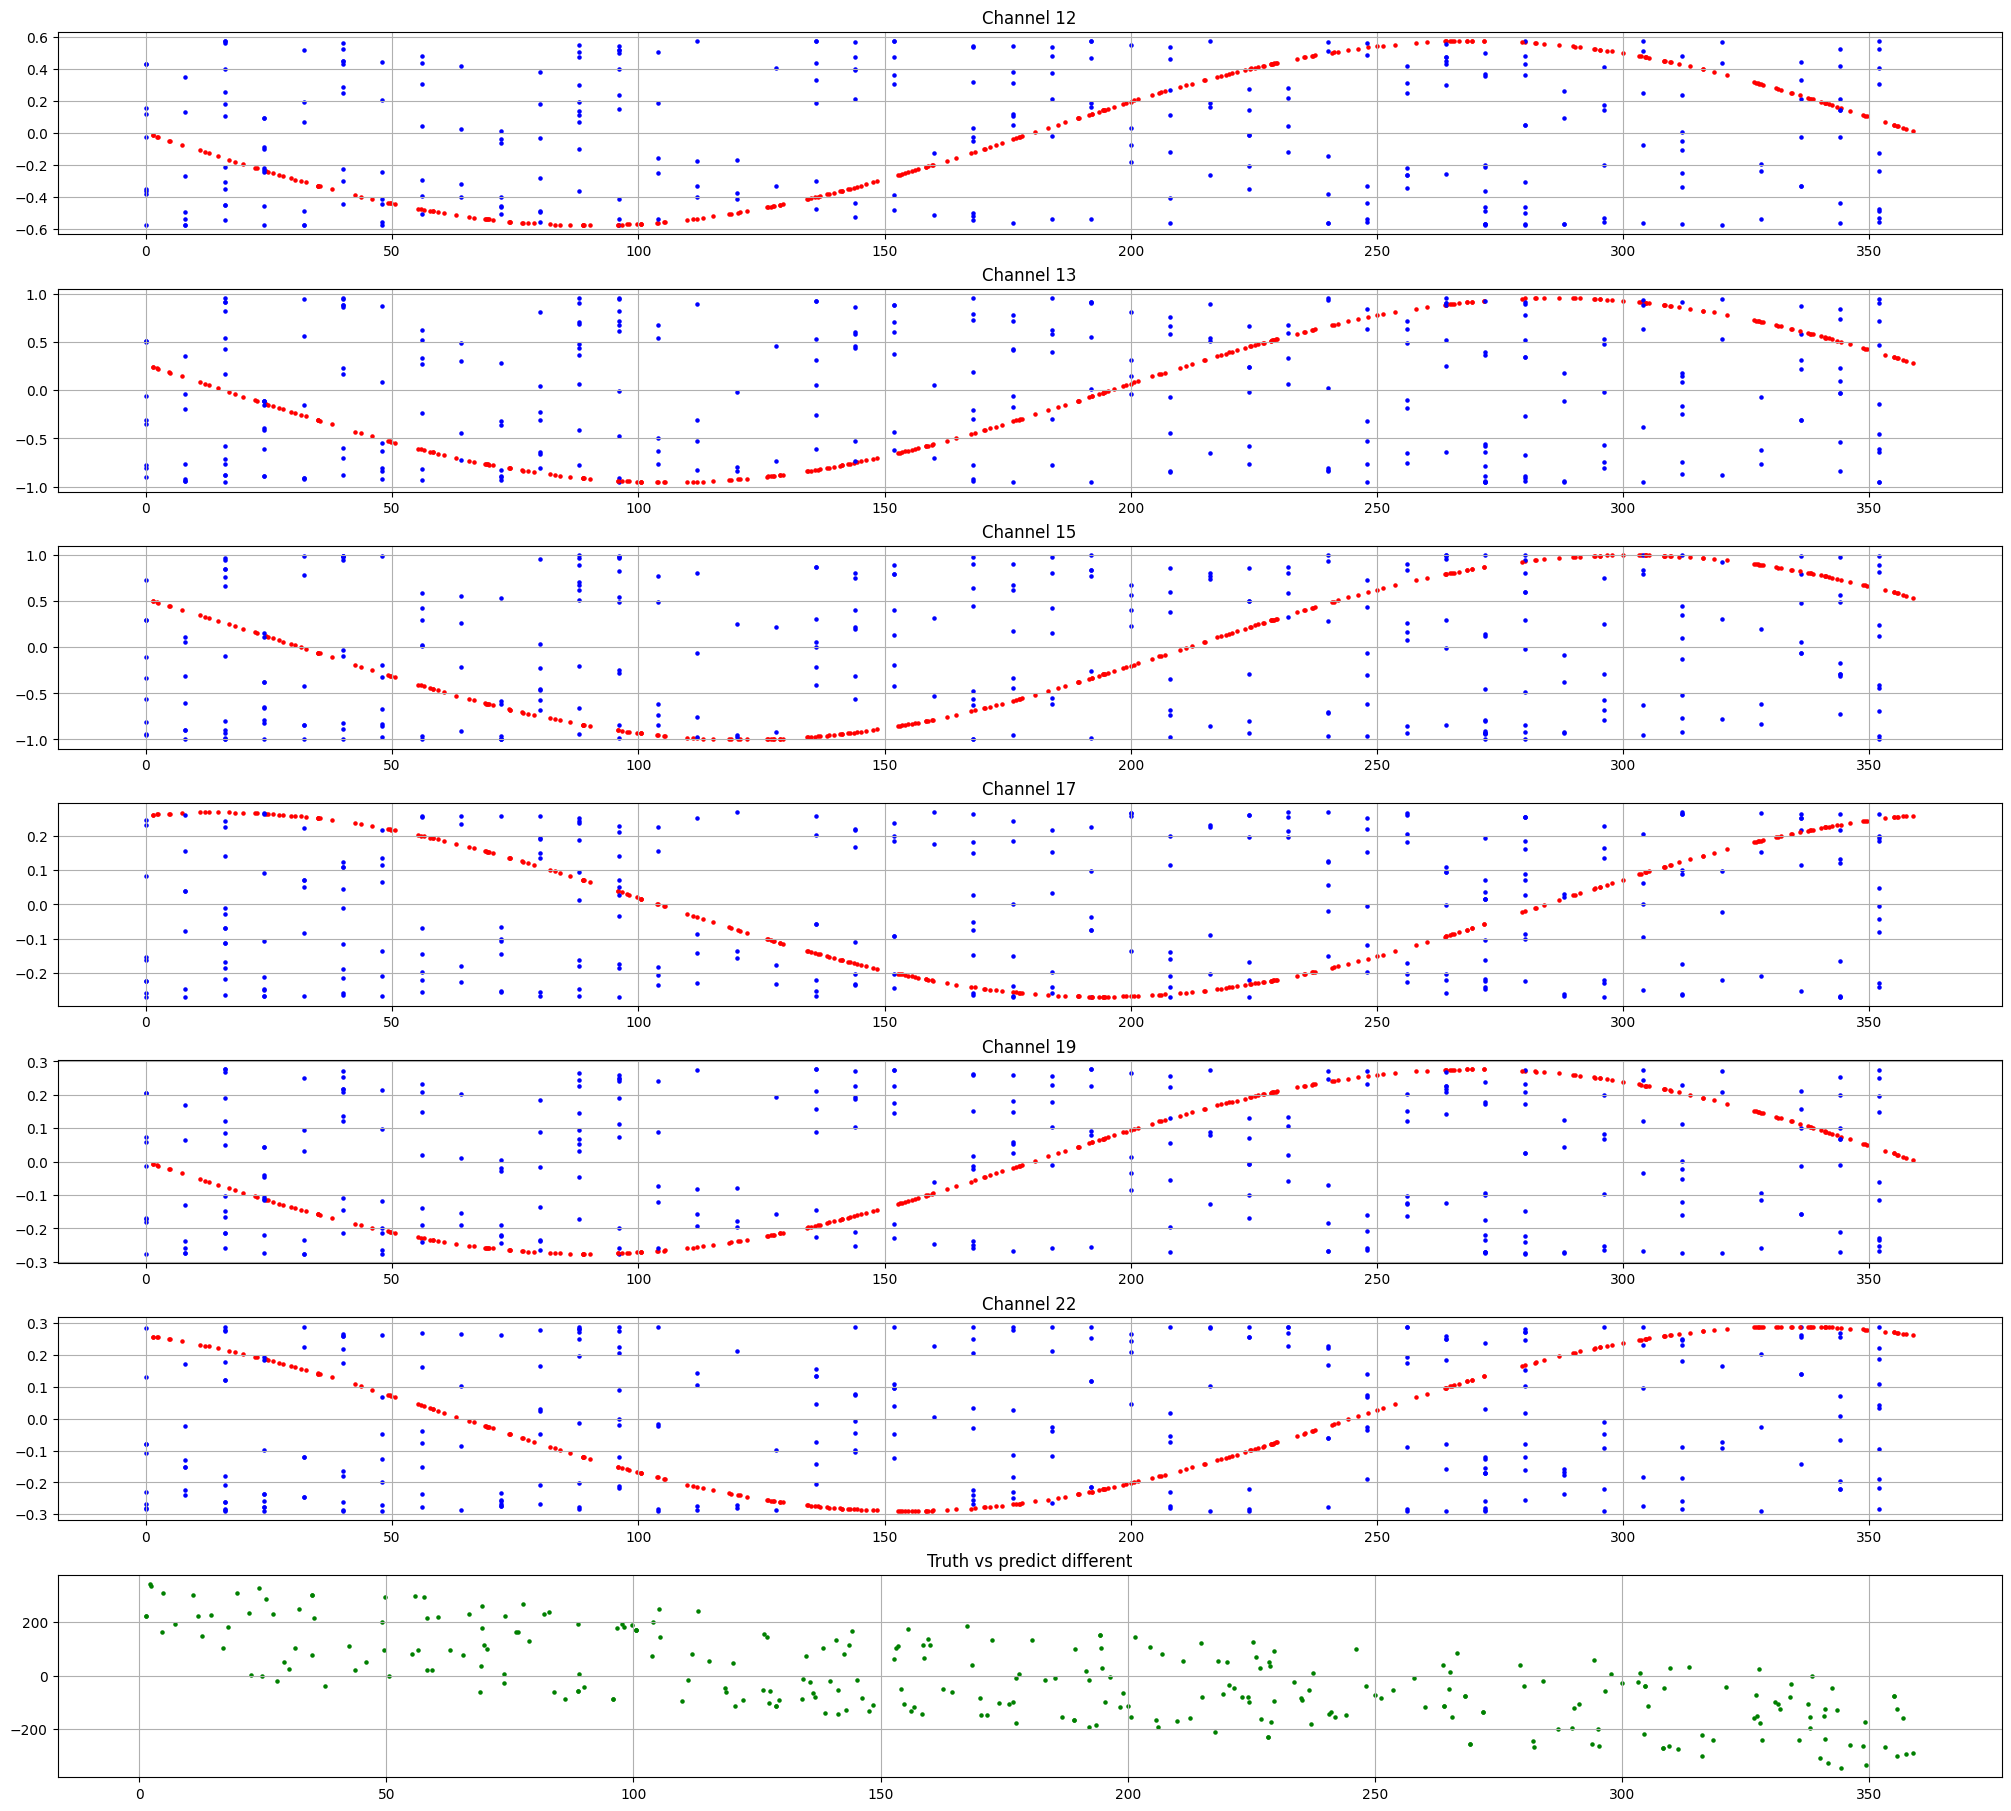

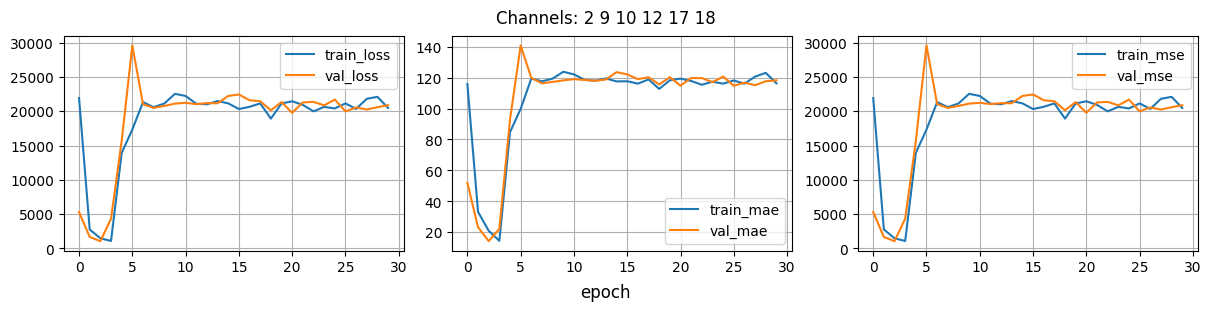

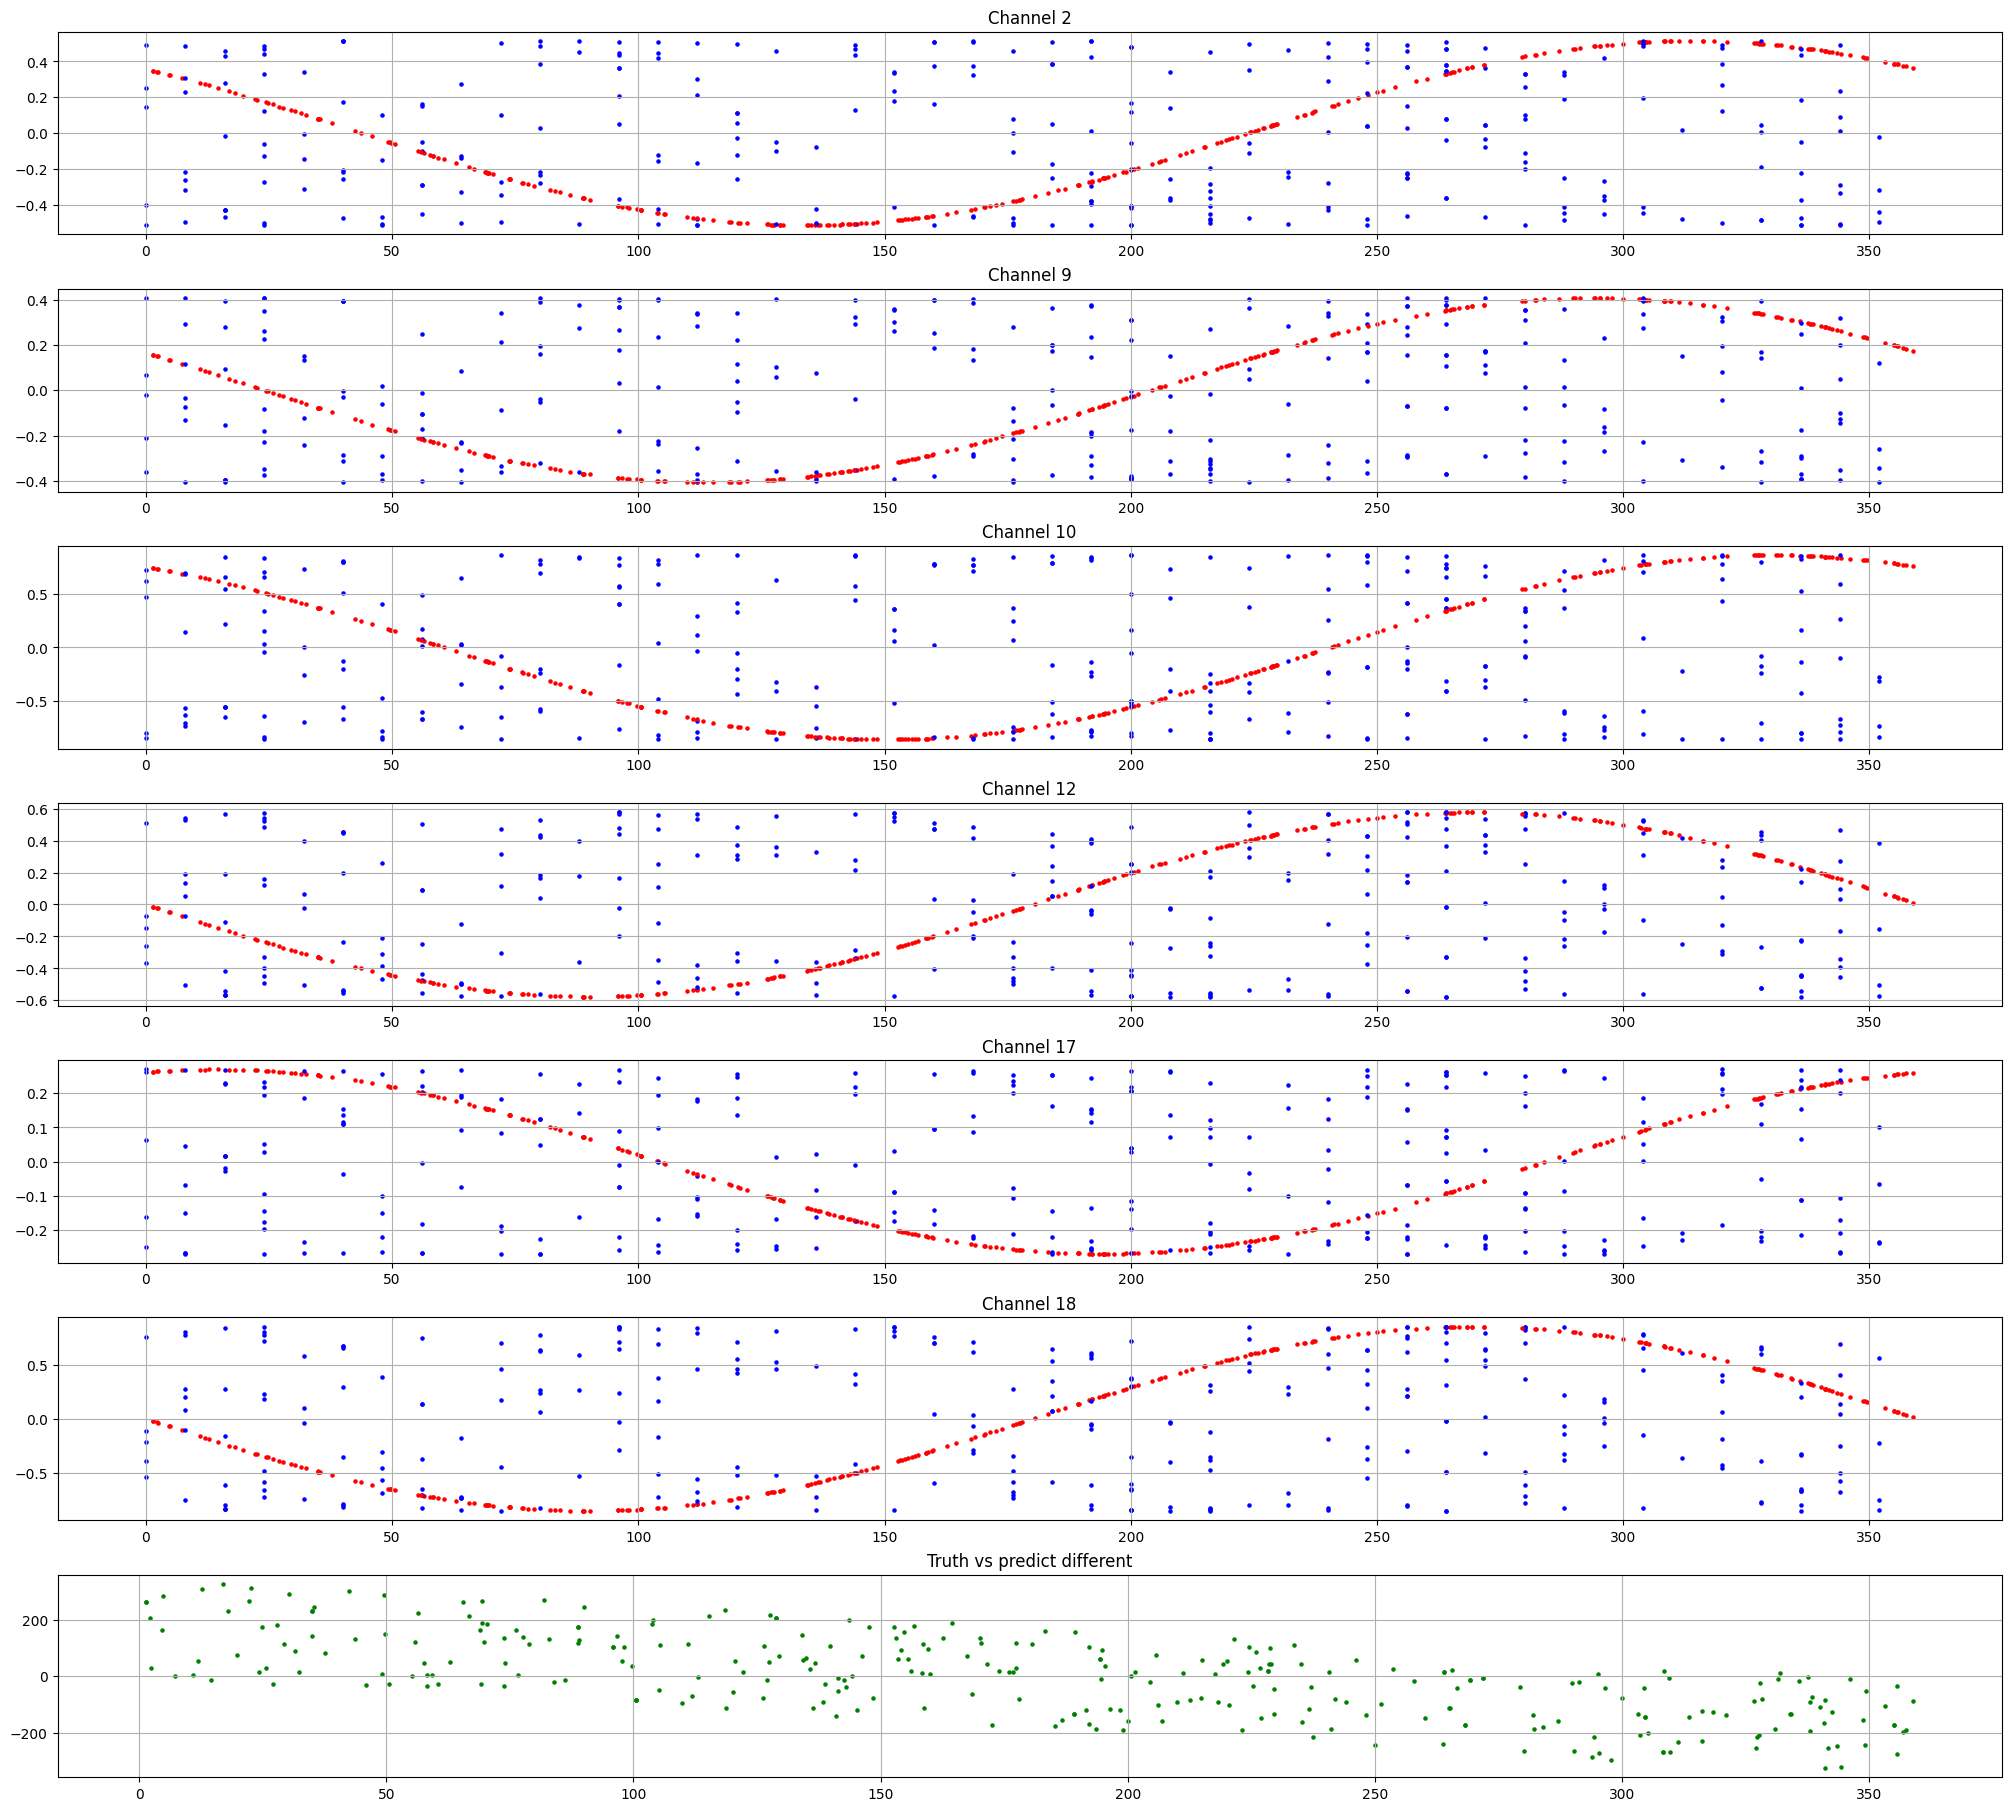

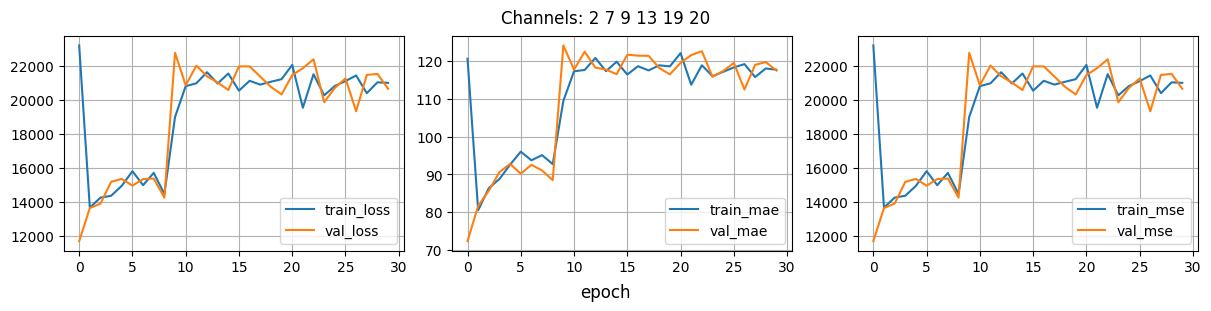

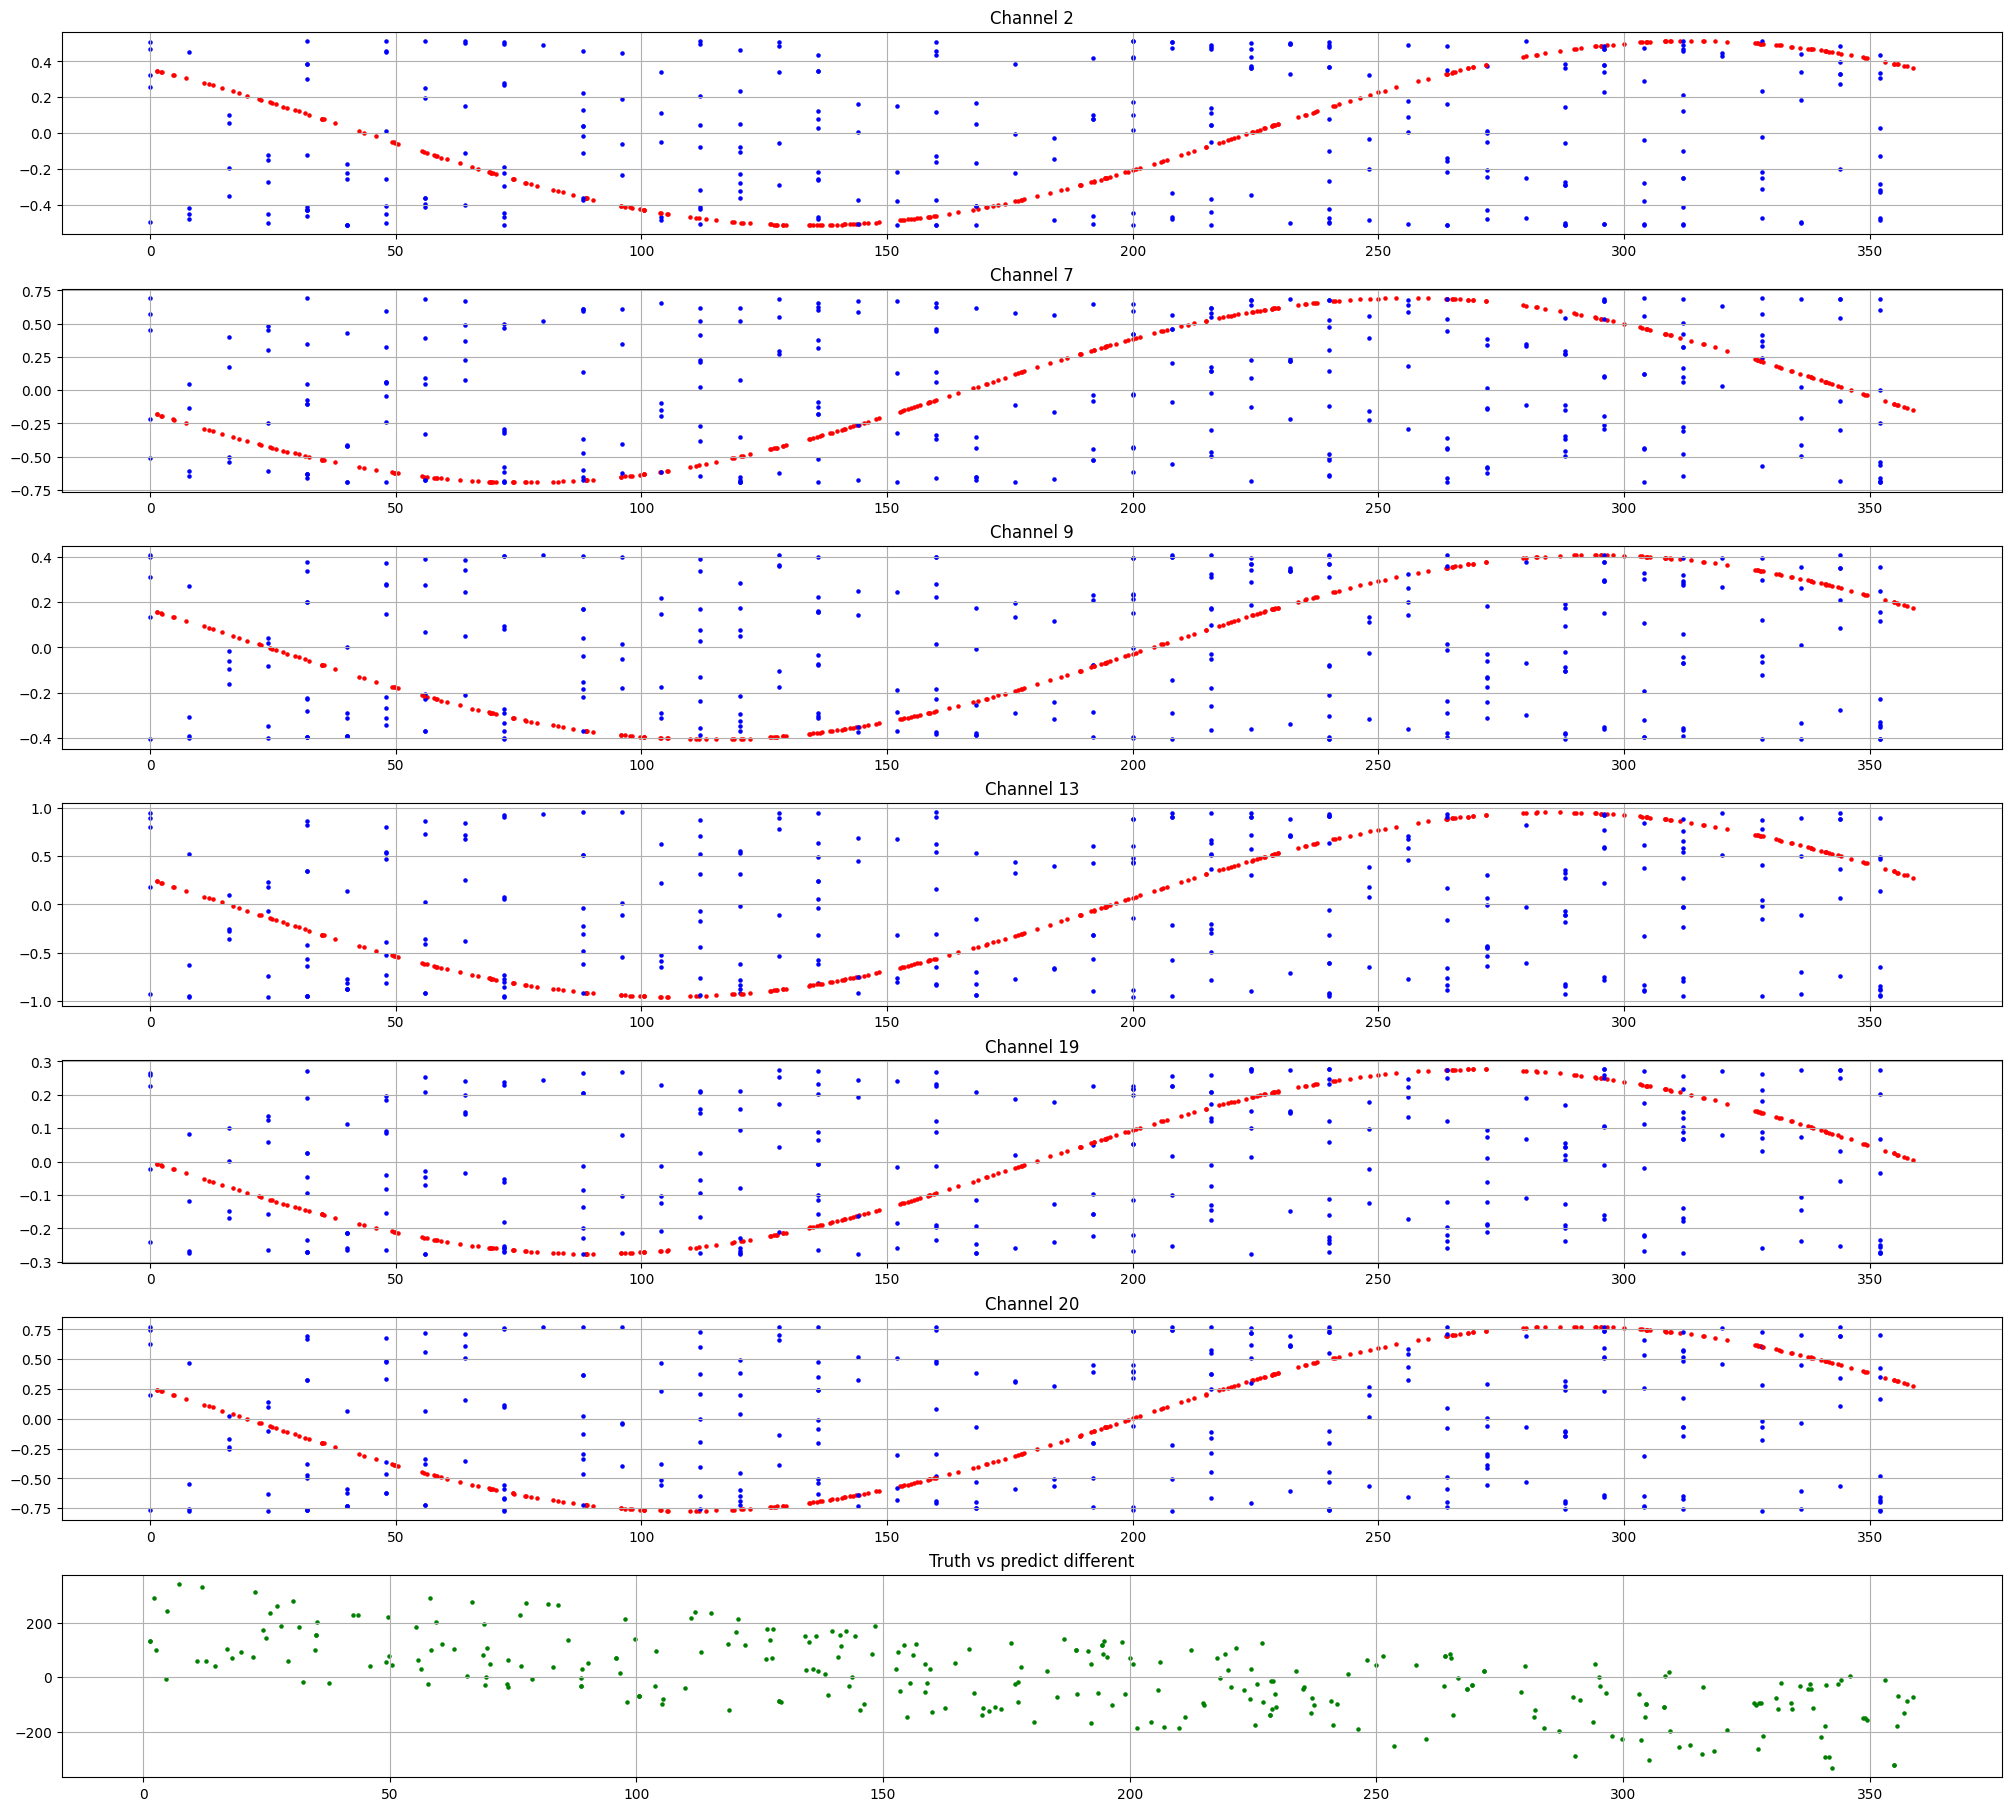

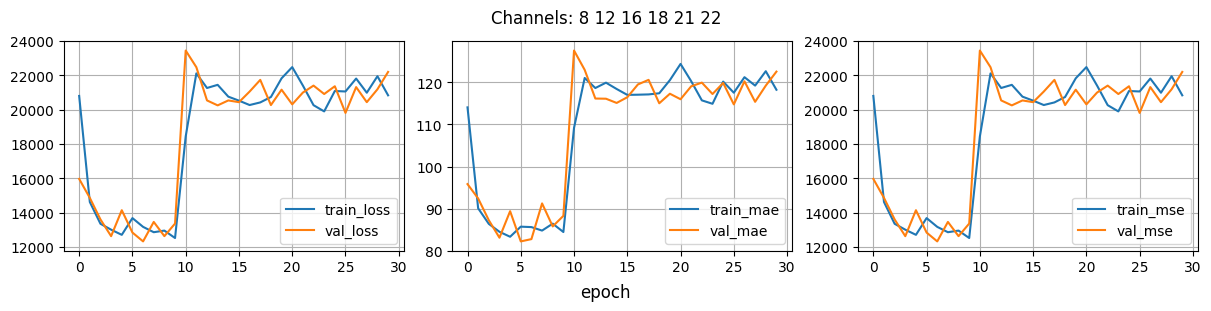

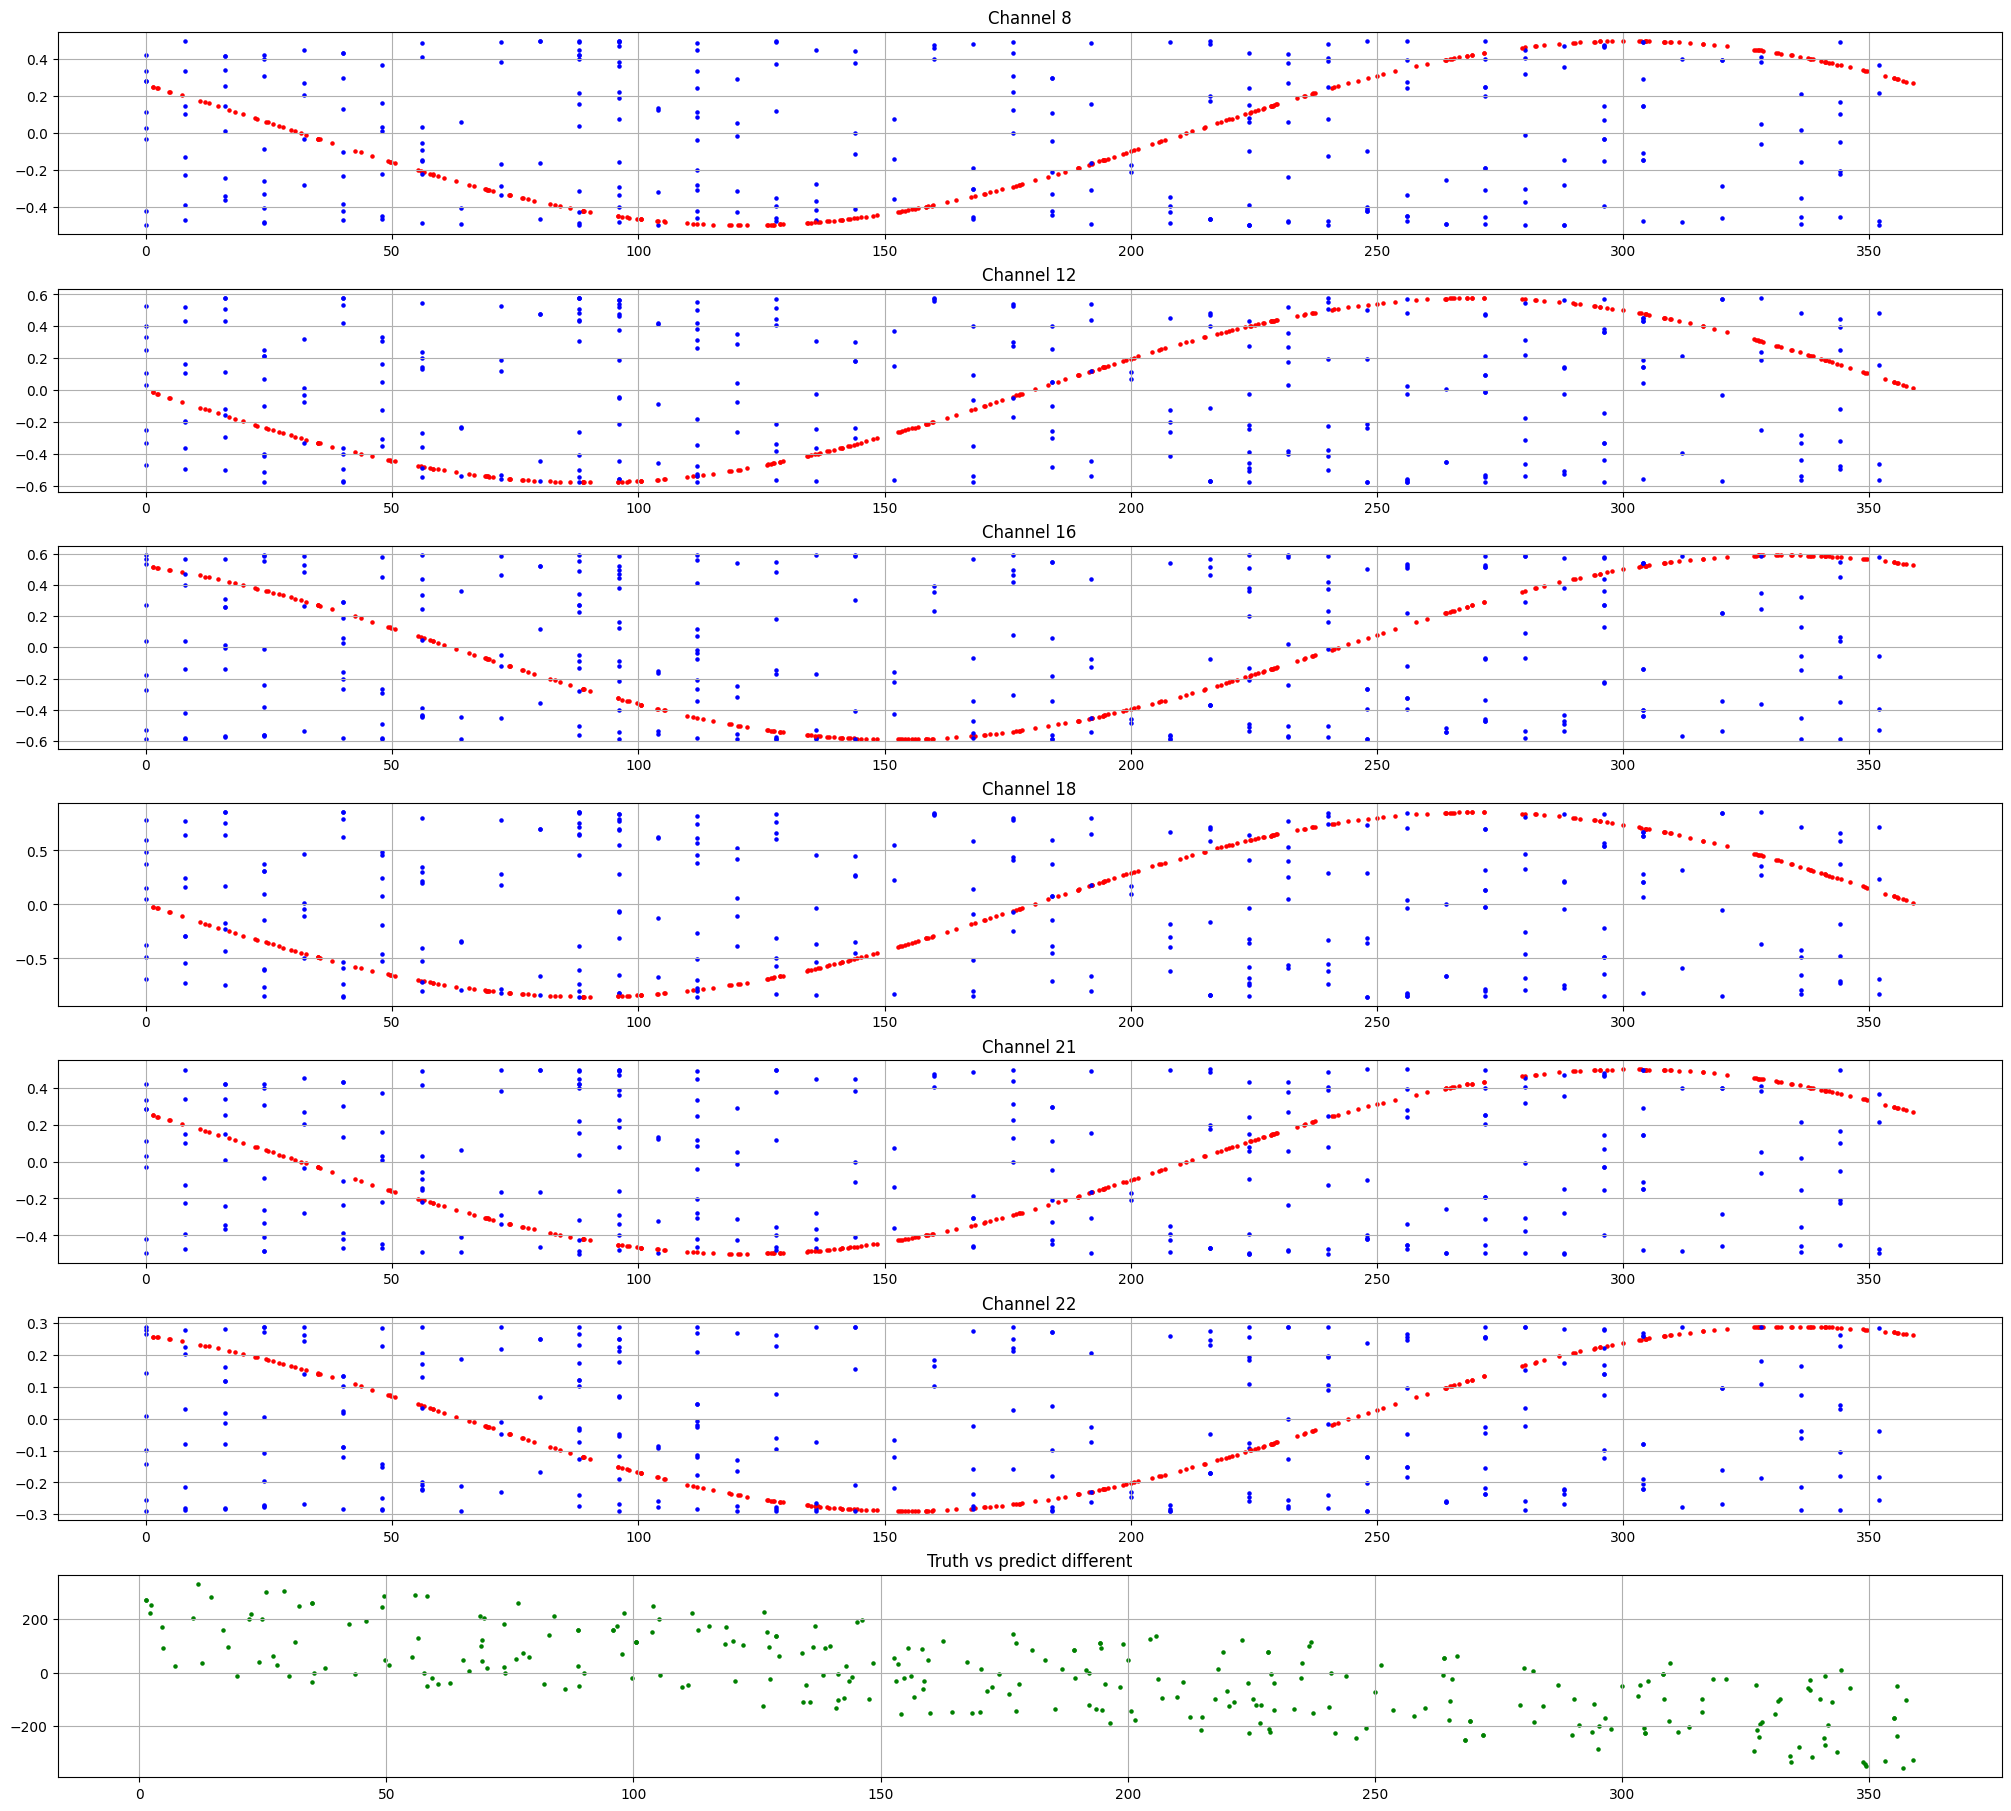

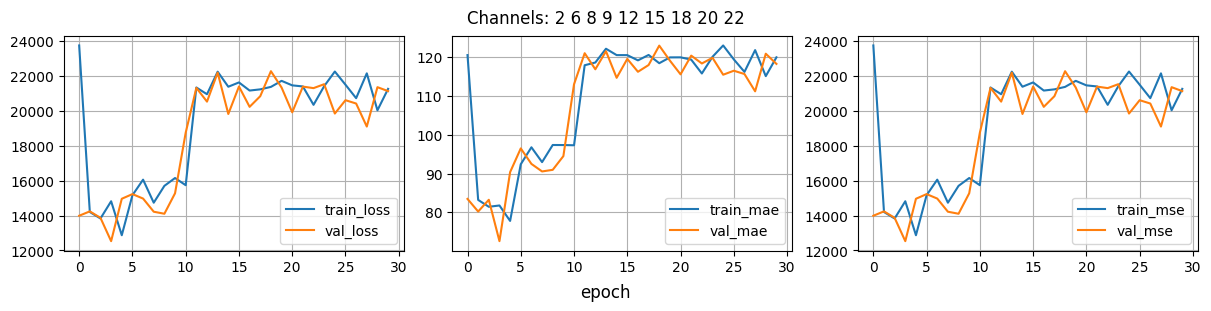

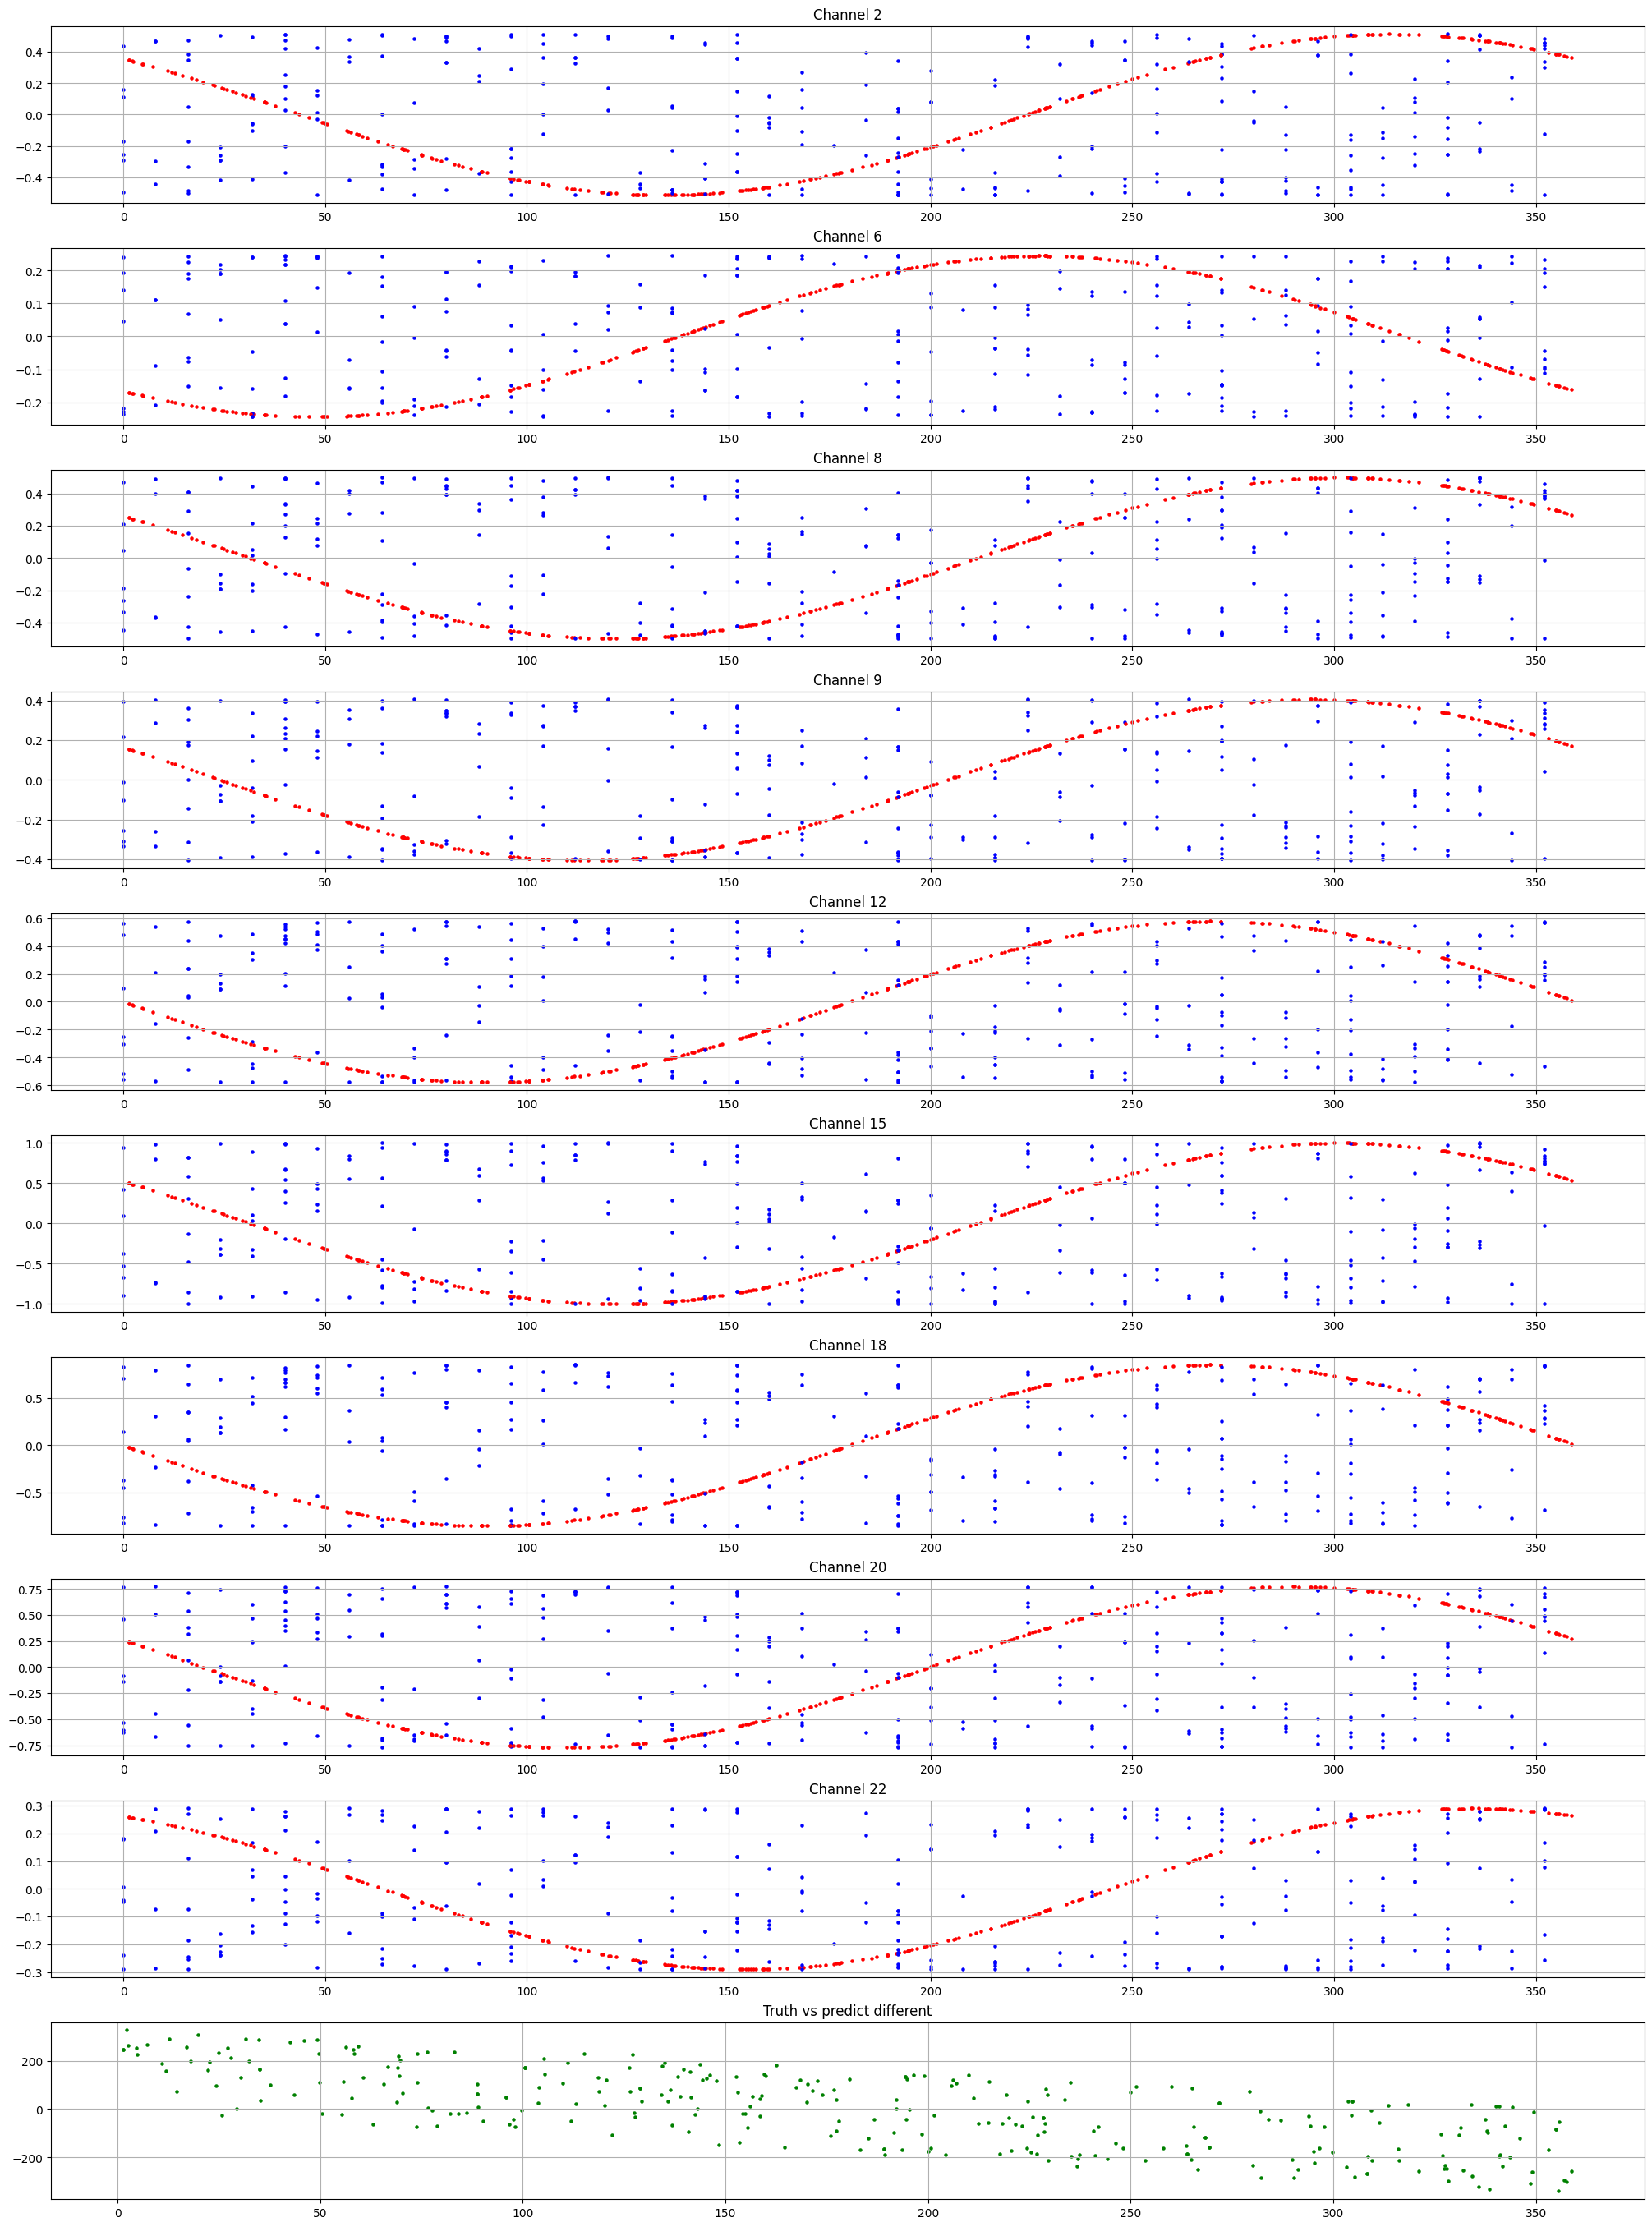

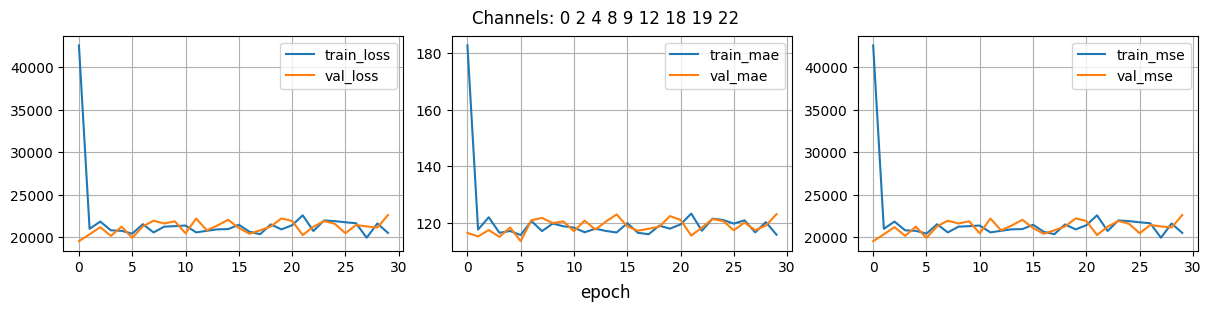

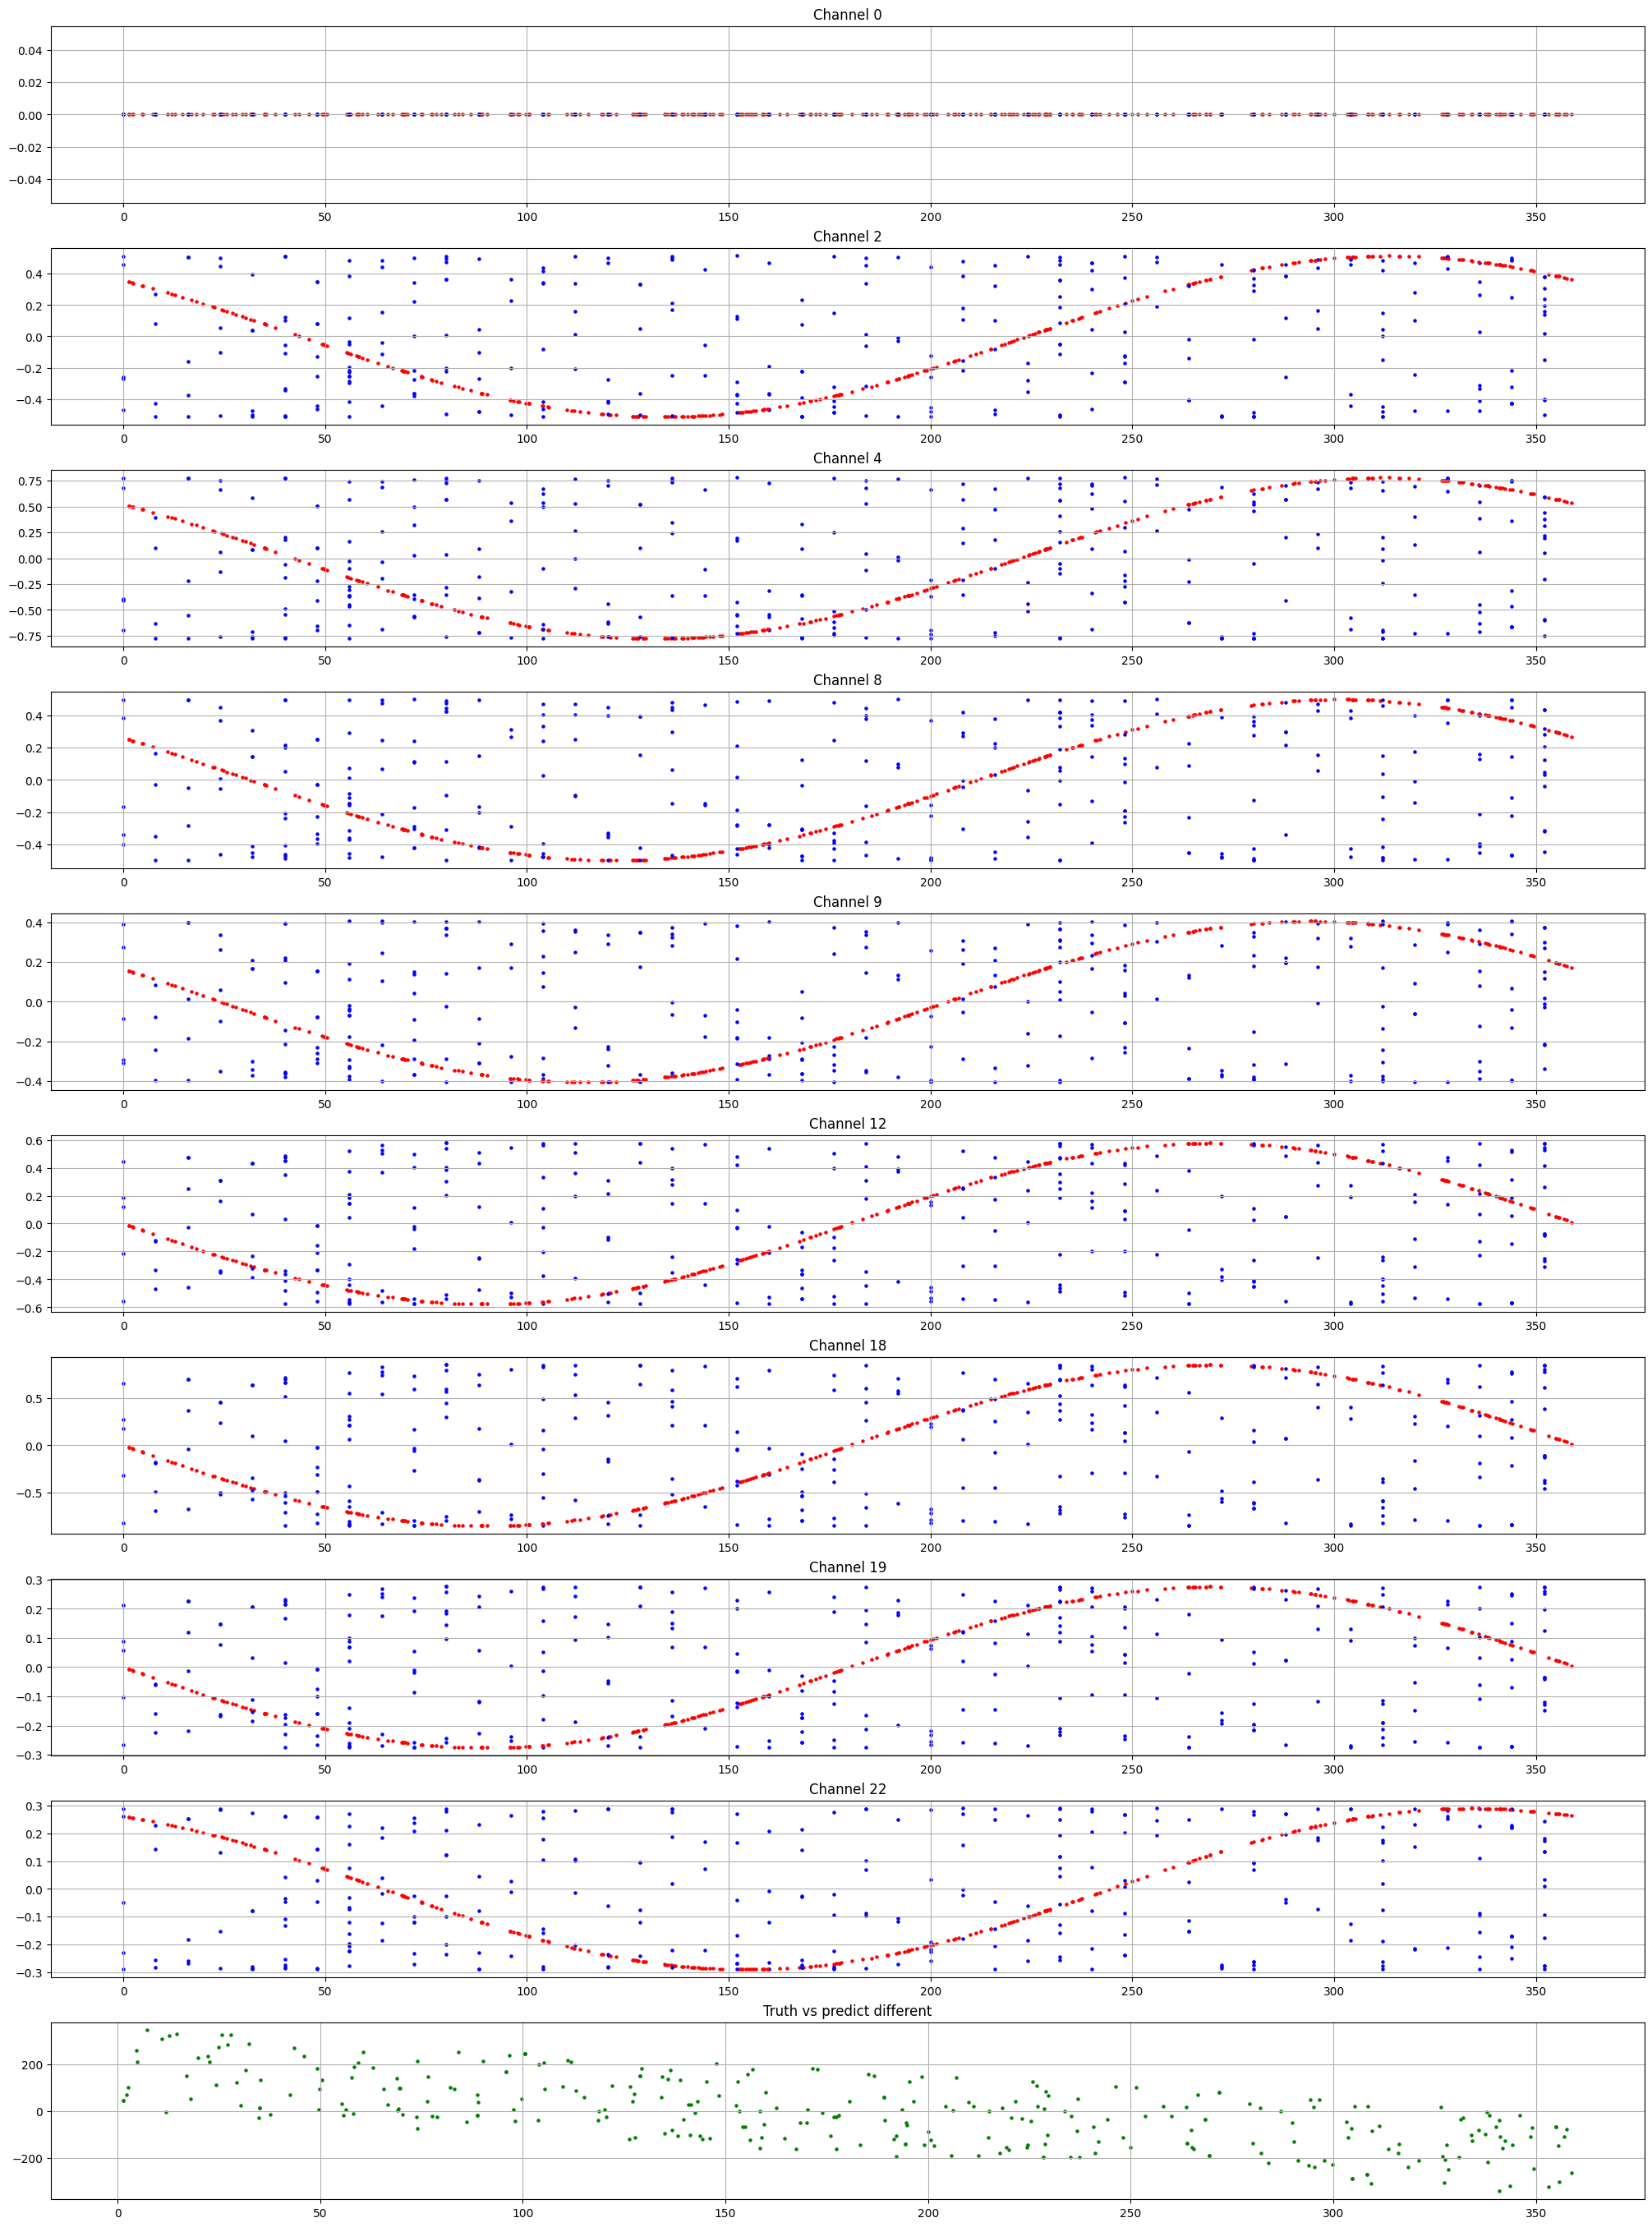

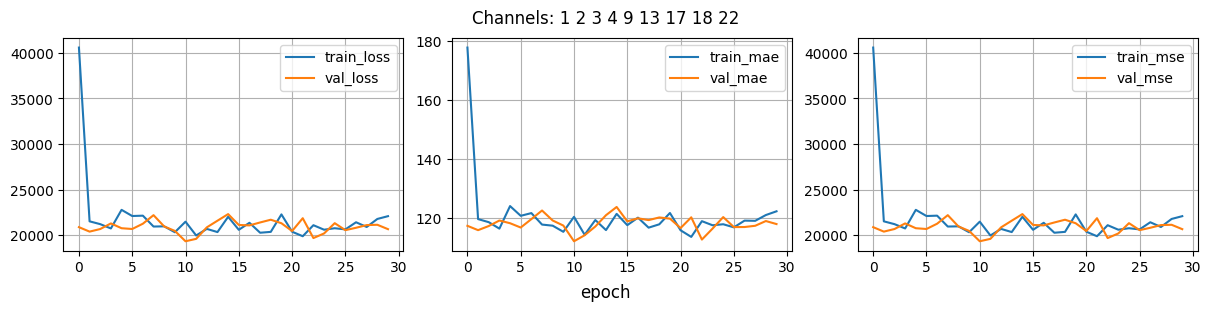

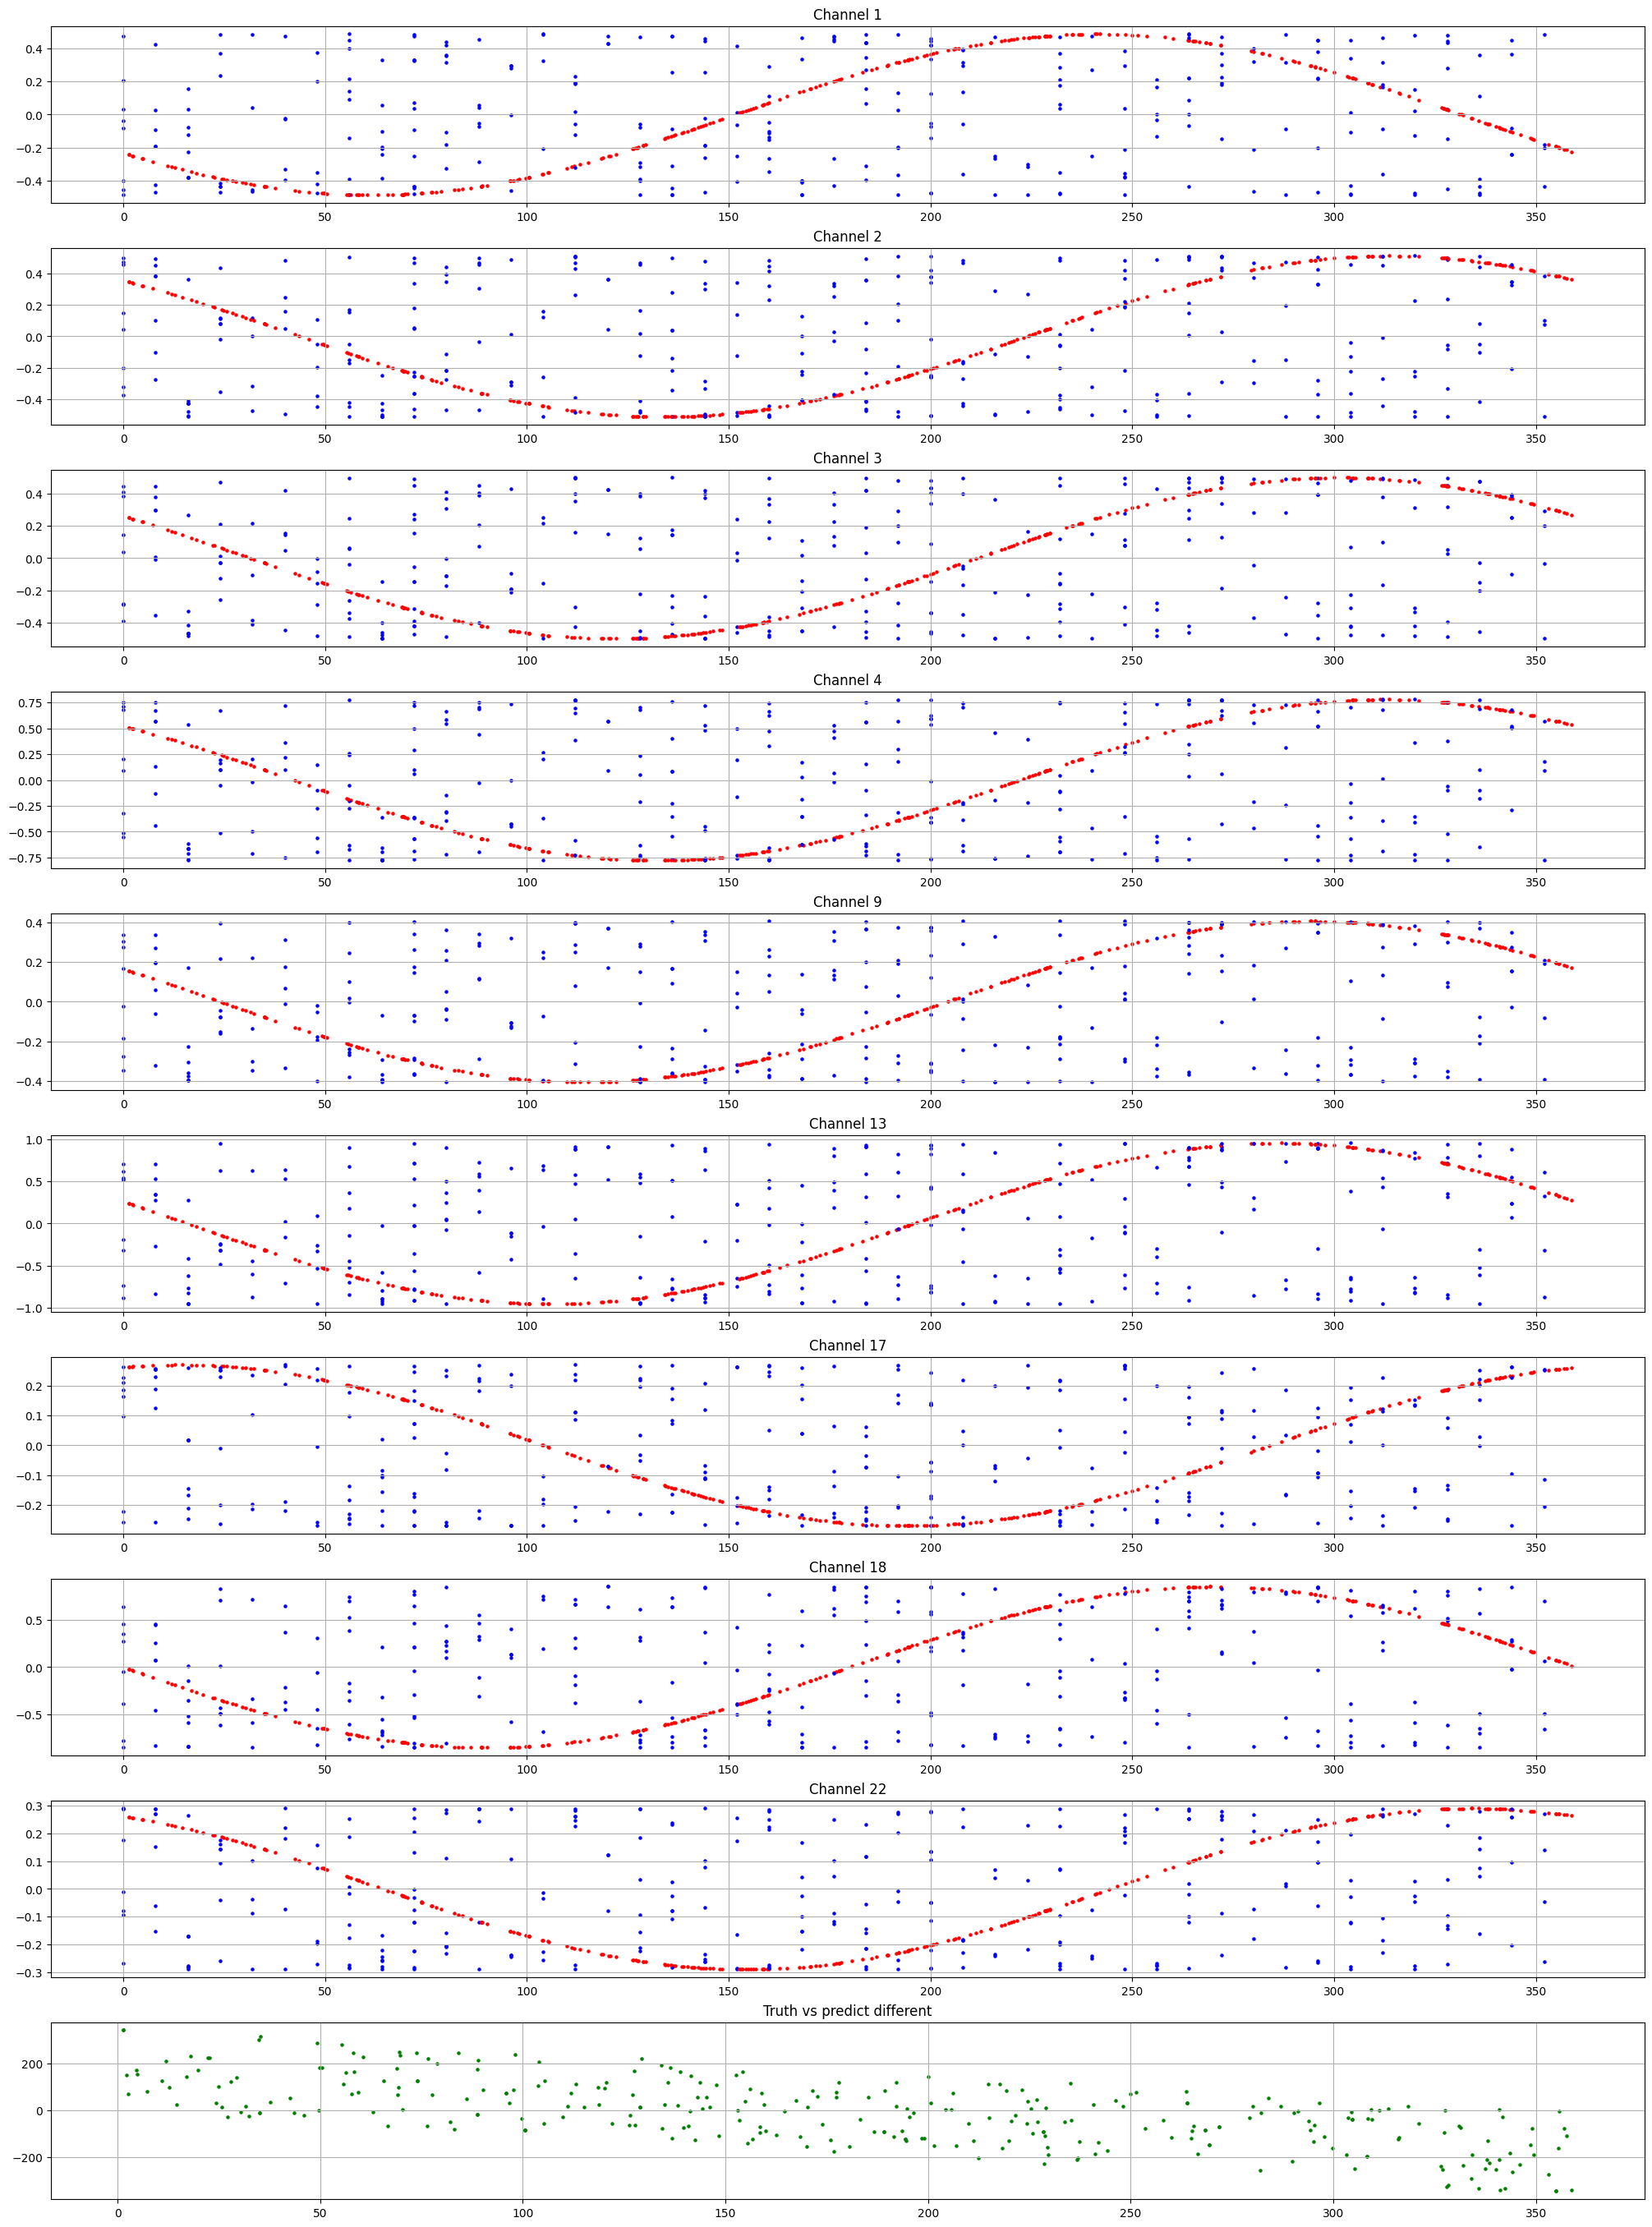

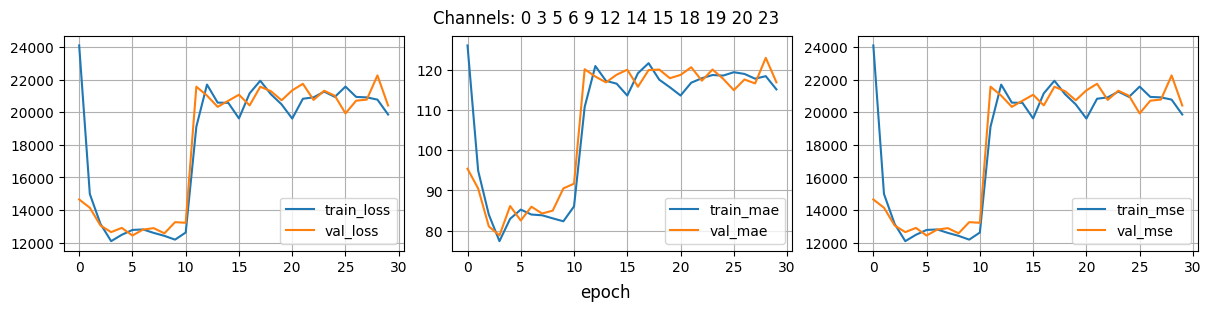

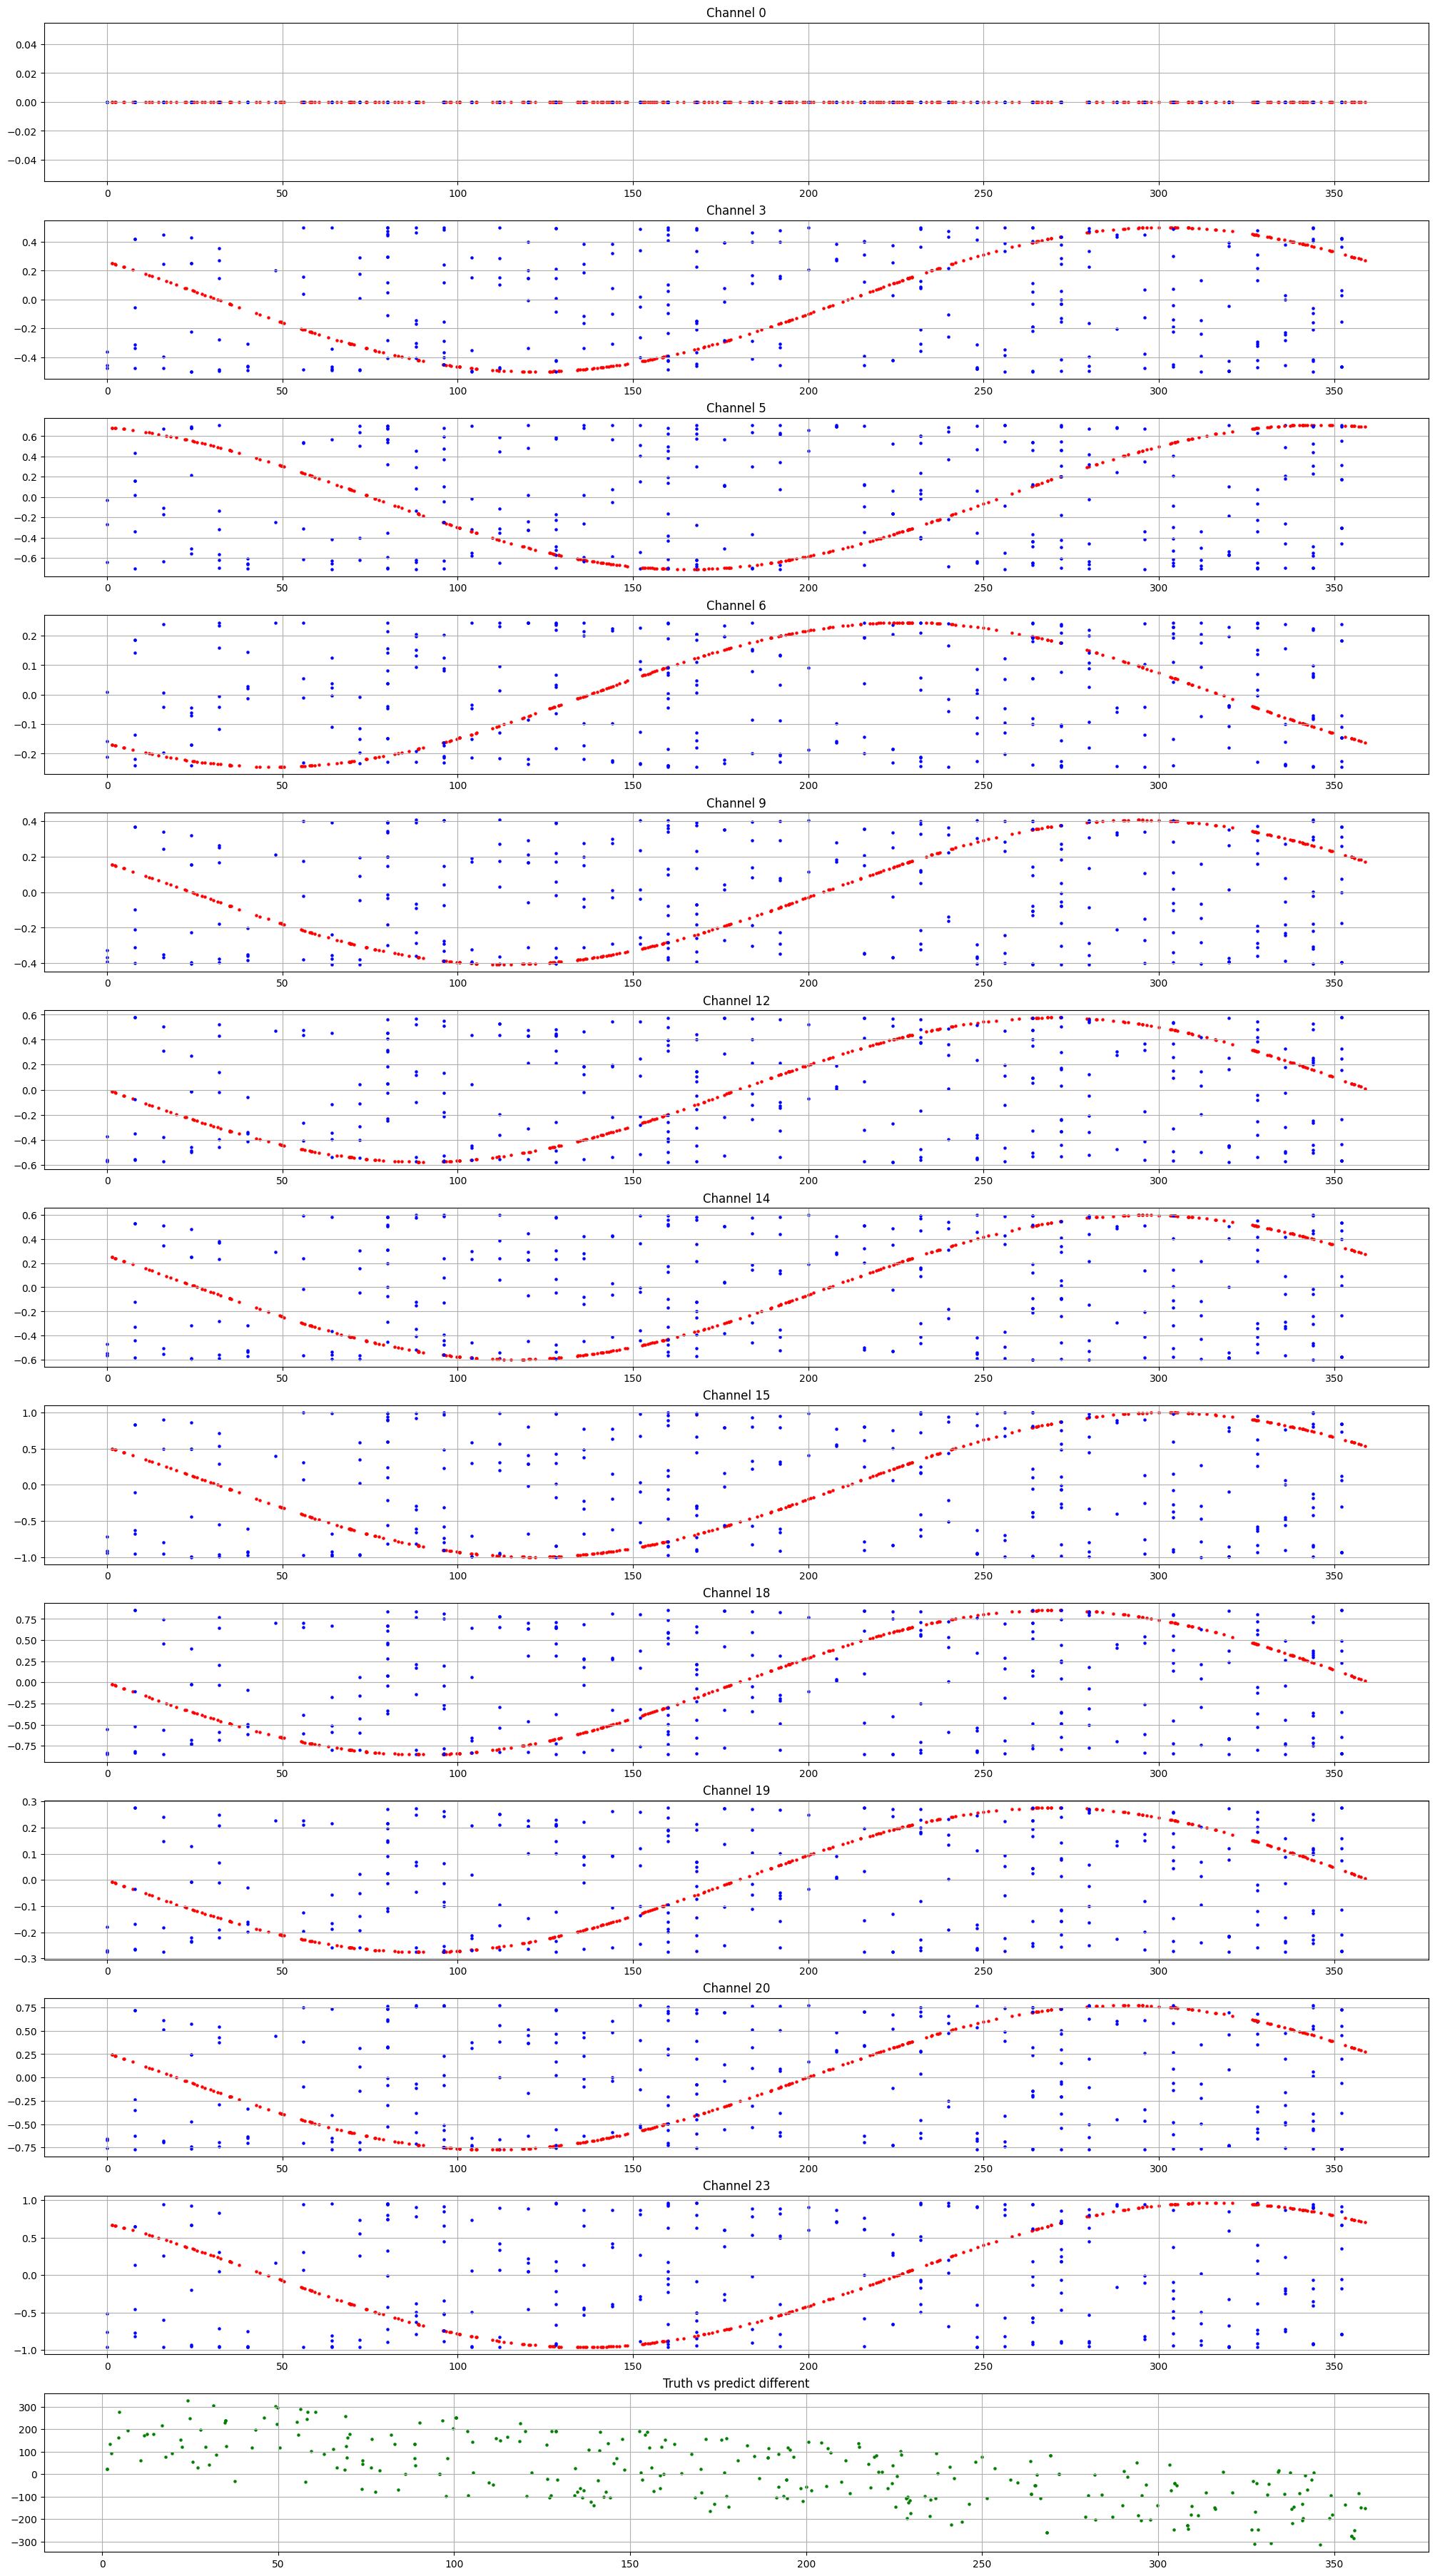

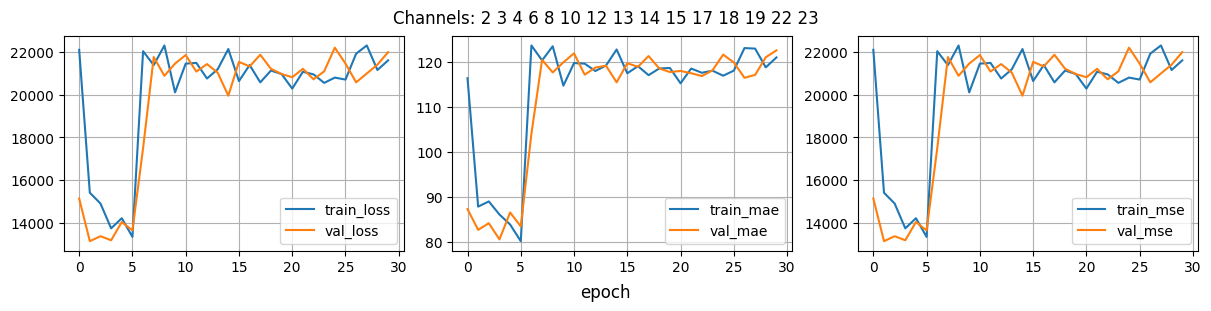

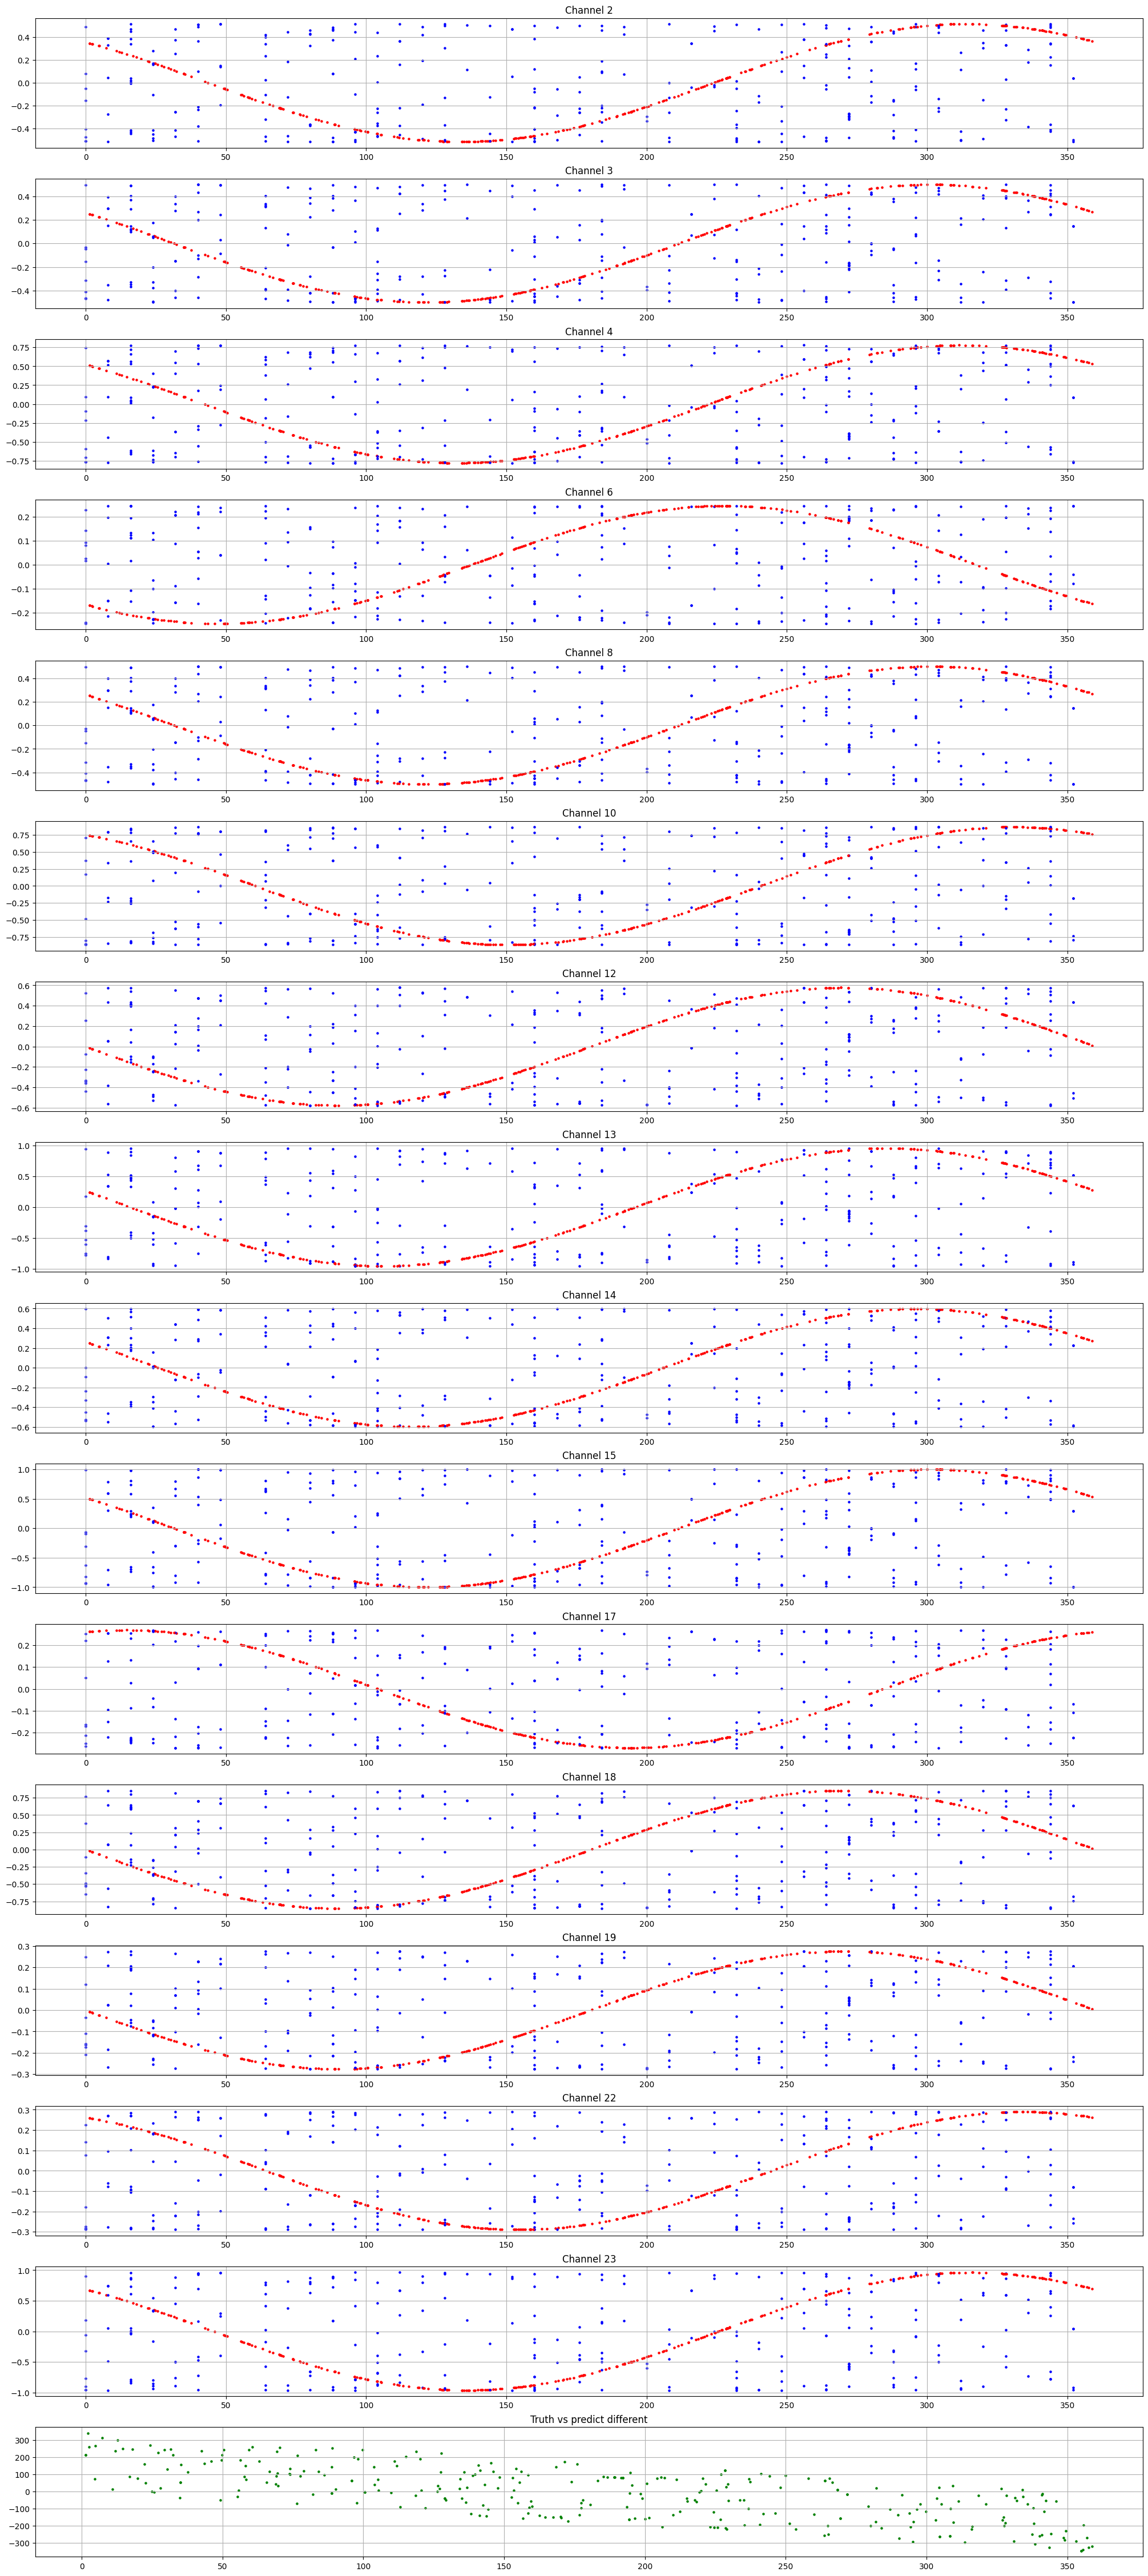

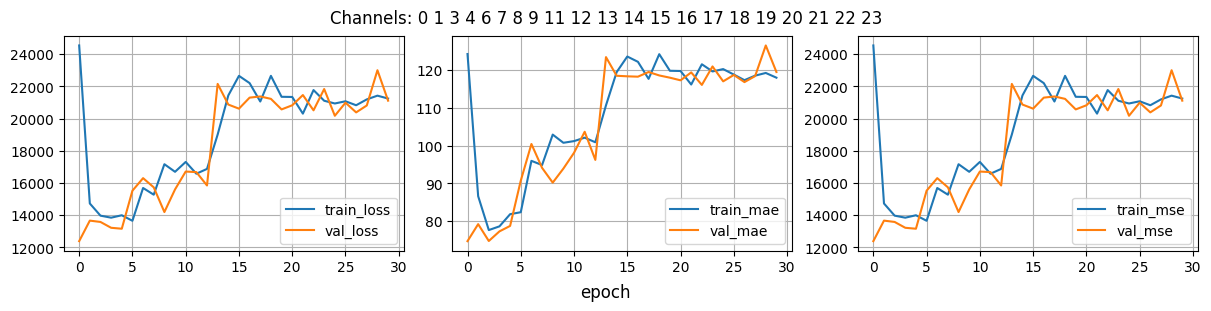

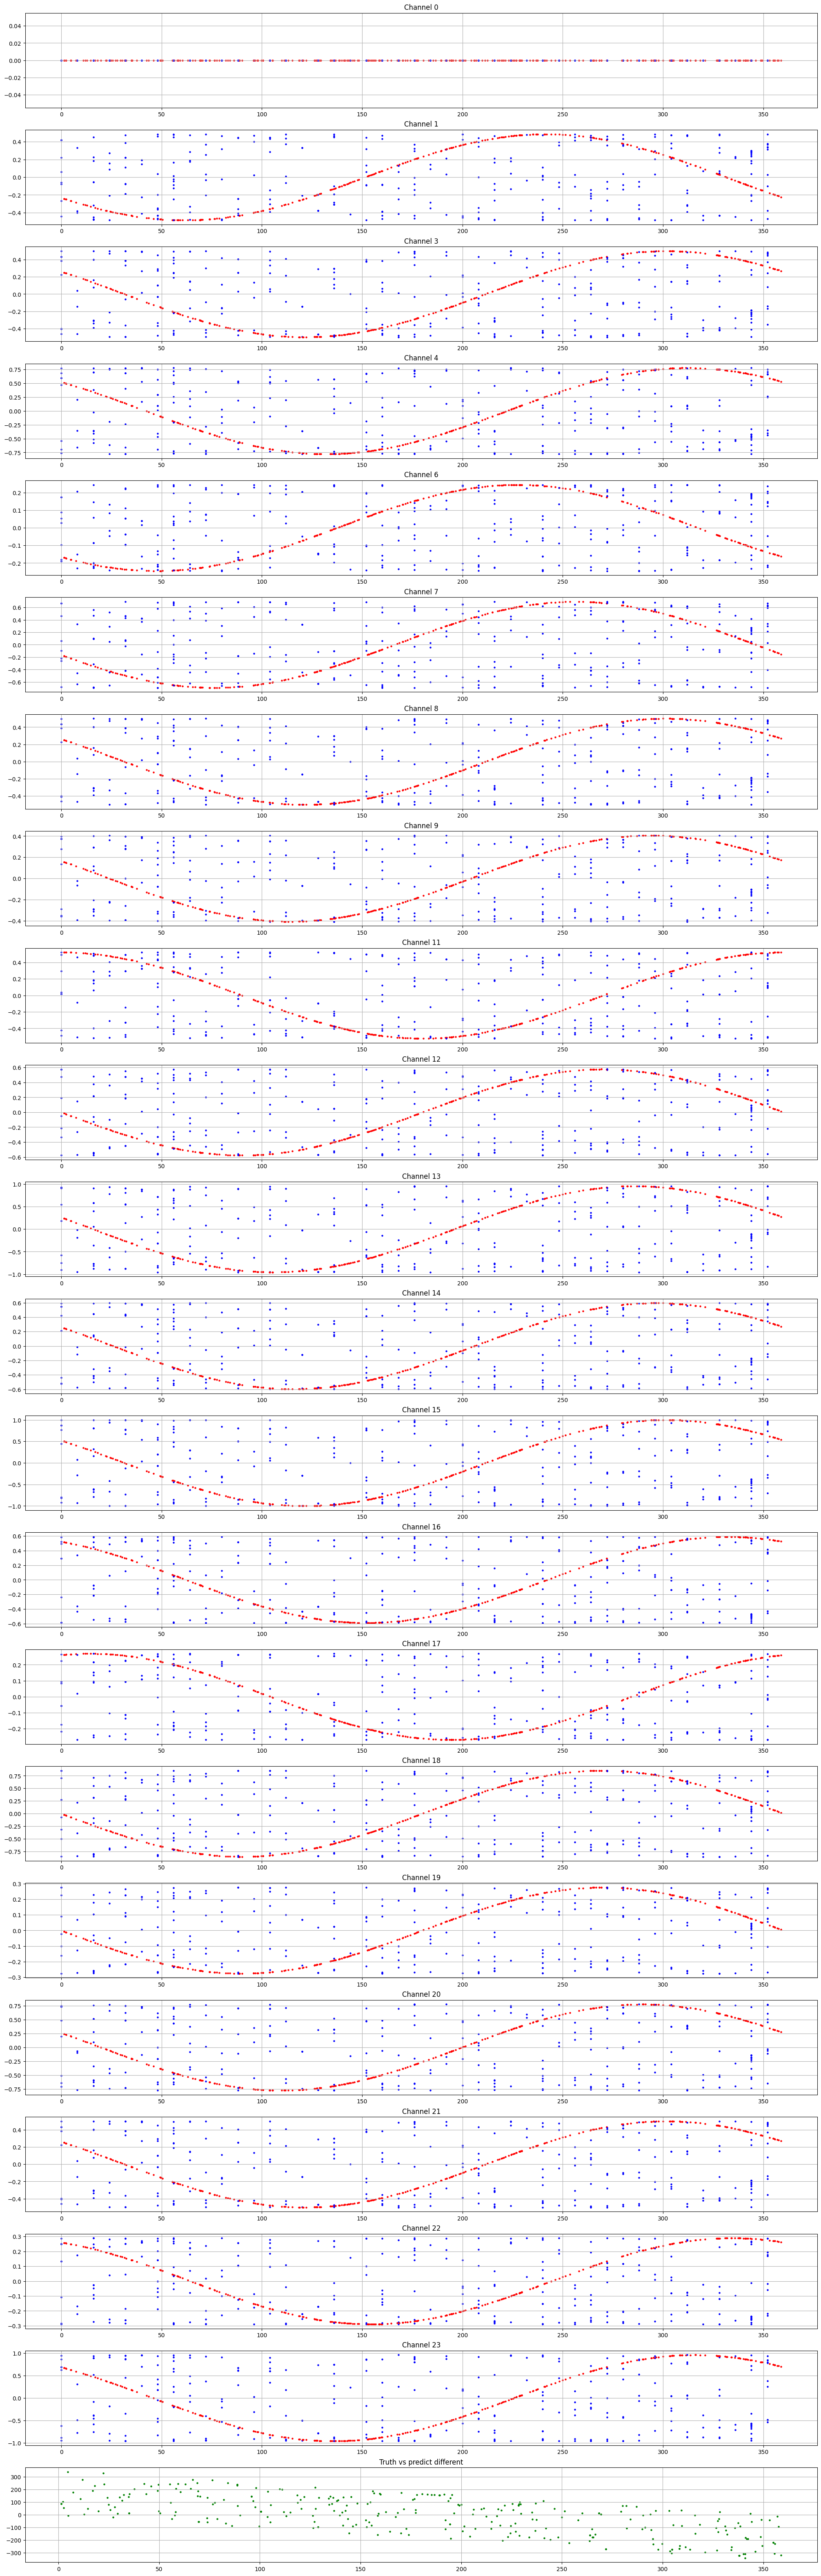

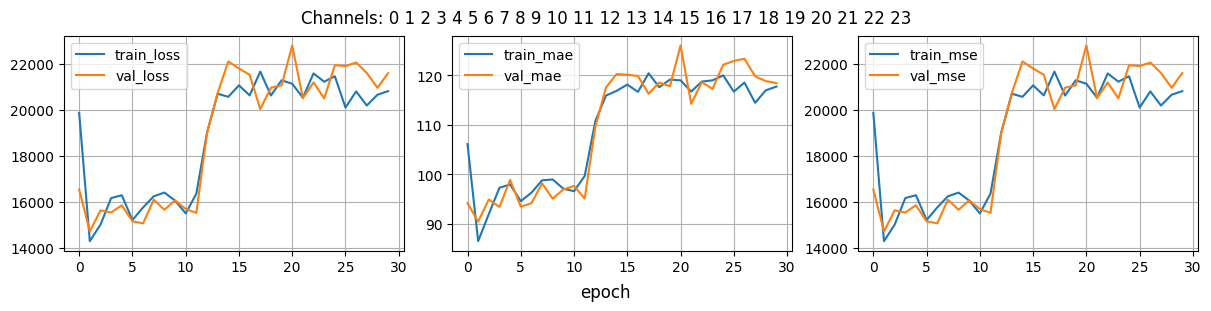

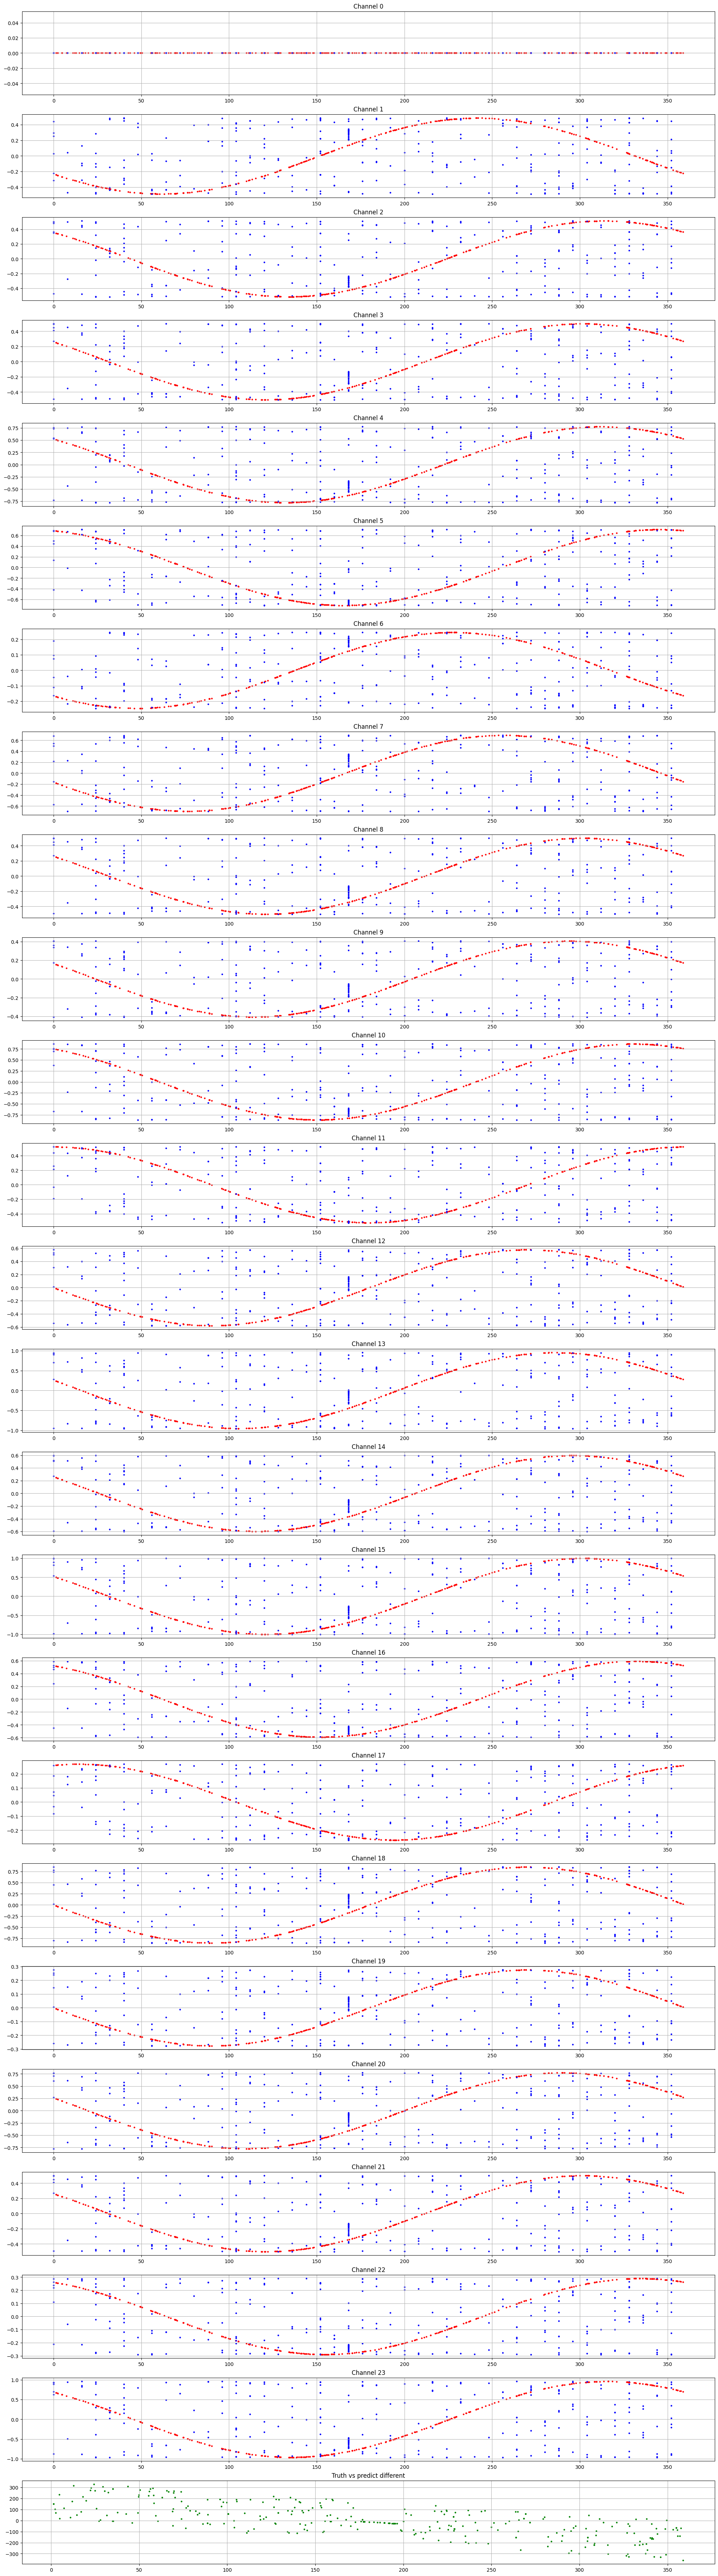

In [13]:
models, evaluates, losses = training_evaluation(top_list_channels, inputs, labels,\
                                                he_initializer=True, loss = 'mse',\
                                                floormod=True, epochs=30, plot=True)
evaluates

2025-03-31 23:36:56.596126: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[[56.38972473144531, 56.38972473144531, 2.2415711879730225]]

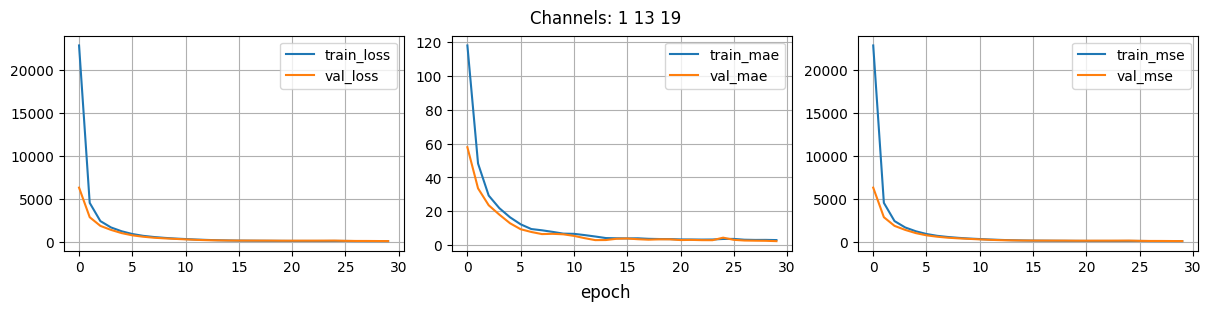

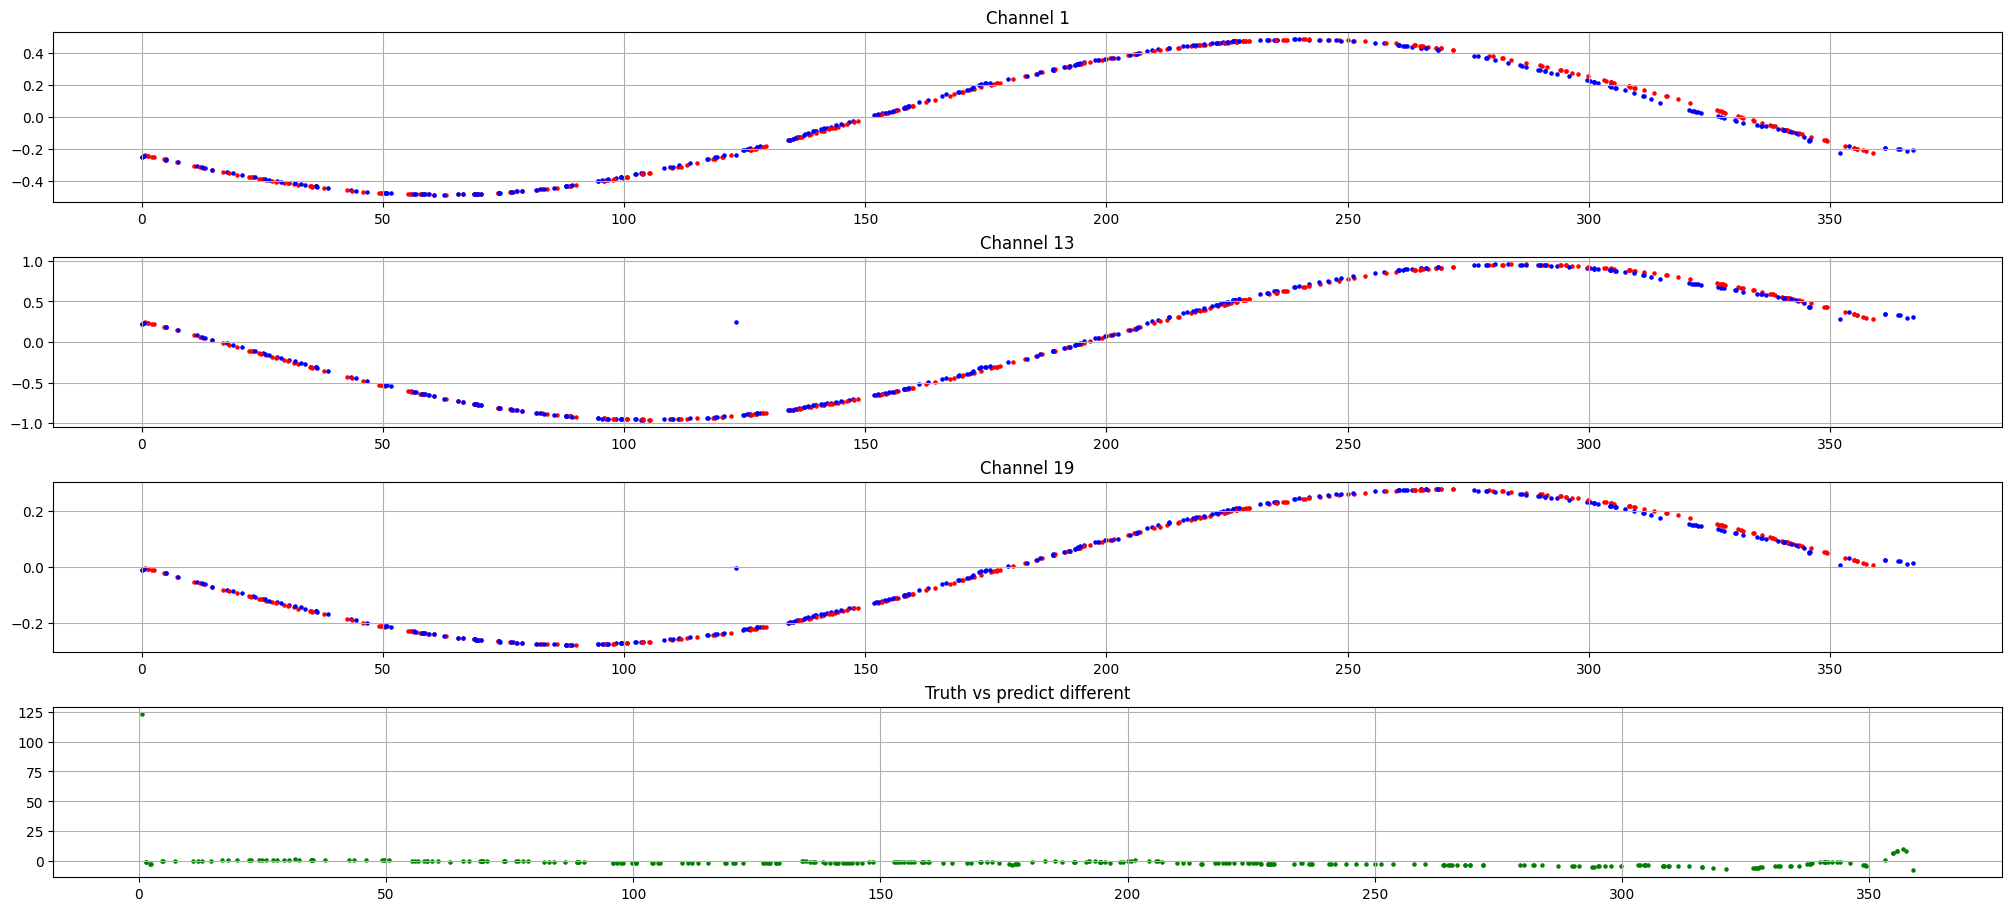

In [18]:
models, evaluates, losses = training_evaluation([top_list_channels[1]], inputs, labels,\
                                                he_initializer=True, loss = 'mse',\
                                                floormod=False, epochs=30, plot=True)
evaluates